## Оглавление
1. [Описание проекта](#description)
2. [План работ](#plan_of_work)
3. [Библиотеки и функции](#library_and_function)
4. [Загрузка данных](#install_data)
5. [Предобработка данных](#data_preprocessing)
6. [Исследовательский анализ данных](#research_data_analysis)
7. [Объединение таблиц](#merging_tables)
8. [Корреляционный_анализ](#correlation_analysis)
9. [Использование пайпланов](#using_pipelines)
10. [Анализ важности признаков](#analysis_of_the_importance)
11. [Сегментация покупателей](#segmentation)
12. [Общий вывод](#the_general_conclusion)

# **В один клик**

<a id="description"></a> 
## Описание проекта:
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. Нам необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

<a id="plan_of_work"></a>
## План работ:

- загрузка данных:
    - загрузить таблицы `market_file.csv`,`zmarket_money.csv`,`zmarket_time.csv`, `money.csv`;
    - изучить таблицы c помощью метода head();
    - изучить таблицы с помощью метода info().
- предобработка данных:
    - проверить датафреймы на явные дубликаты;
    - проверить датафреймы на неявные дубликаты;
    - проверить датафреймы на наличие пропусков;
    - проверить датафреймы на корректность типов данных;
    - устранить проблемы при необходимости.
- исследовательский анализ данных:
    - провести статистический анализ всех признаков;
    - построить графики для каждого признака;
    - провести анализ аномальных значений;
    - подумать над тем, как можно улучшить данные;
    - отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.
- объединение таблиц:
    - объединить таблицы market_file.csv, market_money.csv, market_time.csv;
    - данные о выручке и времени на сайте находятся в одном столбце для всех периодов, в итоговой таблице сделаем отдельный столбец для каждого периода.
- провести корреляционный анализ признаков в итоговом датасете:
    - рассчитать коэффициенты корреляции между всеми признаками;
    - сделайть выводы о мультиколлинеарности и при необходимости устраните её.
-  использование пайплайнов:
    - обработать количественные и категориальные признаки в пайплайне;
    - обучить четыре модели, для каждой из них подобрать как минимум один гиперпараметр. Выбрать подходящую для задачи метрику. Использовать эту метрику при подборе гиперпараметров;
    - выбрать лучшую модель, используя заданную метрику.
- анализ важности признаков:
    - оценить важность признаков для лучшей модели и построить график важности с помощью метода SHAP;
    - сделать выводы о значимости признаков.
- сегментация покупателей:
    - выполнить сегментацию покупателей. Используя результаты моделирования и данные о прибыльности покупателей;
    - выбрать группу покупателей и предложить, как увеличить её покупательскую активность;
    - провести графическое и аналитическое исследование группы покупателей;
    - сделать предложения по работе с сегментом для увеличения покупательской активности;
    - сделать выводы о сегментах.
- общий вывод.



<a id="library_and_function"></a> 
## Библиотеки и функции

In [7]:
!pip install -q --upgrade scikit-learn
!pip install -q --upgrade numba
!pip install -q --upgrade shap

In [8]:
pip install matplotlib==3.7.3

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install phik -q

In [10]:
!pip install imbalanced-learn -q

In [11]:
!pip install shap -q

In [12]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, recall_score, f1_score 

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.feature_extraction.text import CountVectorizer

# загружаем модель шепли
import shap

In [13]:
# Функция для выявления неявных дубликатов
def check_dupl(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            print(data.groupby(col)[col].count())
            print('')

In [14]:
# Функция для постороения гистограммы распределения сгруппированных по целевому признаку
def graf_1(data, col, b1, b2):
    fig, axes=plt.subplots(1, 2, figsize=(15,5), sharey=True, sharex=True)

    data_1 = data.loc[data['покупательская_активность'] == 'Снизилась'][col]
    data_1.plot(kind='hist', bins=b1, ax=axes[0], alpha=0.5, color = 'r')
    axes[0].set_title('Снизилась')
    
    data_2 = data.loc[data['покупательская_активность'] == 'Прежний уровень'][col]
    data_2.plot(kind='hist', ax=axes[1], bins=b2, alpha=0.5, color = 'b')
    axes[1].set_title('Прежний уровень')
    
    fig.suptitle(f'Диаграмма распределения {col}')   

In [15]:
# Функция для постороения боксплота по данным сгруппированным по целевому признаку
def graf_2(data, col):
    fig, axes=plt.subplots(1, 2, figsize=(15,5))

    data_1 = data.loc[data['покупательская_активность'] == 'Снизилась'][col]
    data_1.plot(kind='box', ax=axes[0])
    axes[0].set_title('Снизилась')
    
    data_2 = data.loc[data['покупательская_активность'] == 'Прежний уровень'][col]
    data_2.plot(kind='box', ax=axes[1])
    axes[1].set_title('Прежний уровень')
    
    fig.suptitle(f'Диаграмма размаха {col}') 

In [16]:
def graf_3(data, col):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    sns.histplot(data[col], ax=axes[0])

    axes[0].set_title(f'Гистограмма распределения {col}')
    axes[0].set_ylabel('Количество')
    axes[0].set_xlabel('col')

    data[col].plot(kind='box', ax=axes[1], label='')

    axes[1].set_title(f"Диаграмма размаха {col}")
    axes[1].set_ylabel('col')

    data[col].plot(kind='kde', ax=axes[2])
    axes[2].set_title("График  плотности вероятности")
    axes[2].set_ylabel('Плотность вероятности')
    axes[2].set_xlabel(col)

    plt.show()

In [17]:
def graf_4(data, col, b1): 
    fig, axes = plt.subplots(figsize=(10,3))

    sns.histplot(
        data.query('id in @good')[col], 
        ax=axes, alpha=0.7, bins=b1
    )
    sns.histplot(
        data.query('id in @bad')[col], 
        ax=axes, alpha=0.4, color="r", bins=b1
    )

    plt.suptitle(f'Гистограмма распределение в разрезе целевого признака__{col}.', fontsize=15)
    plt.ylabel('количество')
    plt.show()


In [18]:
# Результат работы функции - таблица с медианными значениям столбцов таблиц,
# полученных при разделении границей number
def analys_1(data, col, number):
    data_1 = pd.DataFrame(data[data[col] > number].select_dtypes(include='number').median())
    data_2 = pd.DataFrame(data[data[col] <= number].select_dtypes(include='number').median())
    data_1['Норма'] = data_2
    data_1.columns =['выбросы', 'норма']
    display(data_1)

<a id="install_data"></a> 
## Загрузка данных

### Загрузим таблицу, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

In [21]:
market_file =pd.read_csv('/Users/tigrankazaran/Desktop/проекты/study_with_teacher_1/market_file.csv')
market_file.head(2)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5


In [22]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [23]:
market_file.columns=[i.replace(' ','_').lower() for i in market_file.columns]

In [24]:
market_file.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Пропусков в данных нет, привели названия столбцов к необходимому виду.

### Загрузим таблицу с данными о выручке, которую получает магазин с покупателя.

In [27]:
market_money=pd.read_csv('/Users/tigrankazaran/Desktop/проекты/study_with_teacher_1/market_money.csv')
display(market_money.head(2))
market_money.info()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [28]:
market_money.columns=[i.replace(' ','_').lower() for i in market_money.columns]
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

Пропусков в данных нет, привели названия столбцов к необходимому виду.

**Загрузим таблицу с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.**

In [31]:
market_time=pd.read_csv('/Users/tigrankazaran/Desktop/проекты/study_with_teacher_1/market_time.csv')
display(market_time.head(2))
market_time.info()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [32]:
market_time.columns=[i.replace(' ','_').lower() for i in market_time.columns]
market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

Пропусков нет, названия столбцов привели к нужному виду. По первым двум строкам можно заметить ошибку в наименовании периода.

### Загрузим таблицу с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

In [35]:
money=pd.read_csv('/Users/tigrankazaran/Desktop/проекты/study_with_teacher_1/money.csv', sep=';', decimal=',')
display(money.head(2))
money.info()

,id,Прибыль
0,215348,0.98
1,215349,4.16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [36]:
money.columns=[i.replace(' ','_').lower() for i in money.columns]
money.columns

Index(['id', 'прибыль'], dtype='object')

Выводы по загрузке данных:
- в данных нет пропусков;
- названия столбцов приведены к нужному стилю;
- стоит быть внимательными со значеними в столбцах, там точно есть ошибки.

<a id="data_preprocessing"></a> 
## Предобработка данных

### Исследуем таблицу   `market_file` на наличие явных дубликатов.

In [40]:
market_file.duplicated().sum()

0

Явных дубликатов нет. Интересно, встречается ли покупатель два раза в таблице. Проверим!

In [42]:
market_file.duplicated(['id']).sum()

0

Таких проблем нет, все покупатели встречаются в таблице по одному разу.

Исследуем типы данных в столбцах на наличие аномалий.

In [45]:
market_file.dtypes

id                                       int64
покупательская_активность               object
тип_сервиса                             object
разрешить_сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object

Типы данных соответсвуют ожижаниям. Осталось проверить столбцы с типом данных `object`  на наличие неявных дубликатов.

In [47]:
#Изучим значения в категориальных столбцах со строковым типом данных
check_dupl(market_file)

покупательская_активность
Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

тип_сервиса
премиум      376
стандарт     914
стандартт     10
Name: тип_сервиса, dtype: int64

разрешить_сообщать
да     962
нет    338
Name: разрешить_сообщать, dtype: int64

популярная_категория
Домашний текстиль                       251
Косметика и аксесуары                   223
Кухонная посуда                         138
Мелкая бытовая техника и электроника    174
Техника для красоты и здоровья          184
Товары для детей                        330
Name: популярная_категория, dtype: int64



Вот и повторение в типе сервиса. Кто-то 10 раз ошибся и указал тип сервиса `стандарт` с ошибкой. Исправим.

In [49]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
check_dupl(market_file)

покупательская_активность
Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

тип_сервиса
премиум     376
стандарт    924
Name: тип_сервиса, dtype: int64

разрешить_сообщать
да     962
нет    338
Name: разрешить_сообщать, dtype: int64

популярная_категория
Домашний текстиль                       251
Косметика и аксесуары                   223
Кухонная посуда                         138
Мелкая бытовая техника и электроника    174
Техника для красоты и здоровья          184
Товары для детей                        330
Name: популярная_категория, dtype: int64



### Исследуем таблицу `market_money`.

In [51]:
market_money.duplicated().sum()

0

In [52]:
market_money.dtypes

id           int64
период      object
выручка    float64
dtype: object

In [53]:
check_dupl(market_money)

период
предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: период, dtype: int64



Дубликатов нет, типы данных ожидаемые, неявных дубликатов также нет.

### Исследуем таблицу   `market_time`.

In [56]:
market_time.duplicated().sum()

0

In [57]:
market_time.dtypes

id         int64
период    object
минут      int64
dtype: object

Явных дубликатов нет. Тип данных соответствует ожиданиям.

In [59]:
check_dupl(market_time)

период
предыдцщий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64



Очевидно, что у нас есть ошибка в столбце `период`, исправим её.

In [61]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
check_dupl(market_time)

период
предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64



Ошибки исправлены, можно идти дальше.

### Исследуем таблицу   `money`.

In [64]:
money.duplicated().sum()

0

In [65]:
money.dtypes

id           int64
прибыль    float64
dtype: object

Дубликатов нет, столбцов с типом данных `object` тоже нет. Можно переходить к исследовательскому анализу данных.

In [67]:
money

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


In [68]:
money = money.set_index('id')

In [69]:
money

,прибыль
id,
215348,0.98
215349,4.16
215350,3.13
215351,4.87
215352,4.21
...,...
216643,4.44
216644,6.11
216645,3.29


Выводы к разделу:
- в таблицах нет явных дубликатов;
- в таблице `market_file` исправлена ошибка в столбце `тип_сервиса`;
- в таблице `market_time` исправлена ошибка в столбце `период`;
- во всех таблицах типы данных ожидаемые.

<a id="research_data_analysis"></a> 
## Исследовательский анализ данных

### Исследовательский анализ данных таблицы `market_file`

In [73]:
# Создадим список с названием числовых столбцов за исключением столбца 'длительность'
number = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 
          'акционные_покупки', 
          'средний_просмотр_категорий_за_визит',
          'неоплаченные_продукты_штук_квартал',
          'ошибка_сервиса', 'страниц_за_визит'
]

In [74]:
# создадим две таблицы с данными о клиентах, активность которых не упала
market_file_good = market_file.loc[market_file['покупательская_активность'] == 'Прежний уровень'].\
reset_index(drop=True)
# с данными о клиентах, активность которых снизилась
market_file_bad = market_file.loc[market_file['покупательская_активность'] == 'Снизилась'].\
reset_index(drop=True)

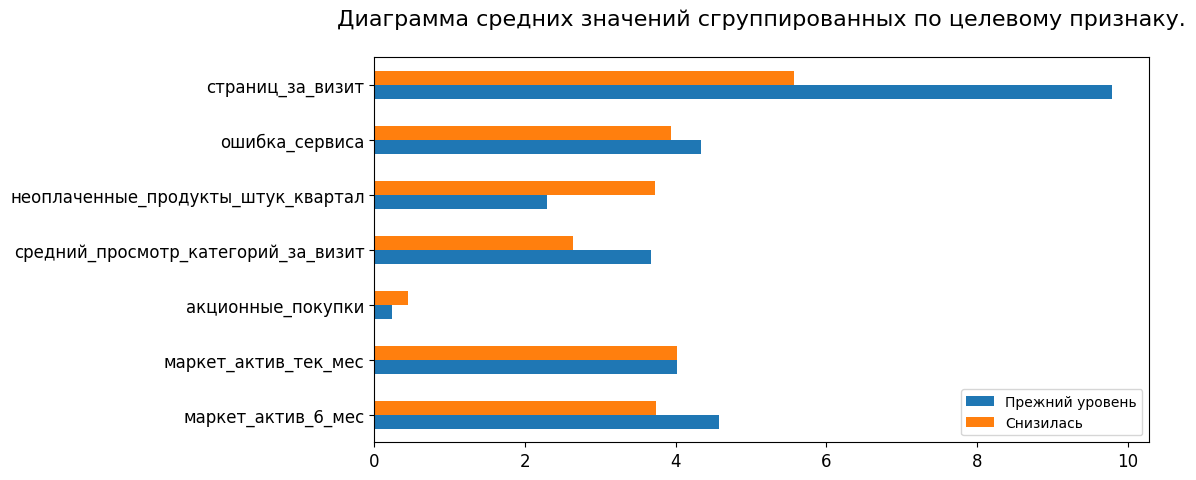

In [75]:
# Создадим таблицу содержащую средние значения числовых столбцов сгруппированных по целевому признаку
market_file_good_number = pd.DataFrame(market_file_good[number].agg('mean'))
market_file_good_number['bad'] = pd.DataFrame(market_file_bad[number].agg('mean'))
market_file_good_number.columns = ['Прежний уровень', 'Снизилась']

# Построим столбчатую диаграмму
market_file_good_number.plot(kind='barh', figsize=(10, 5), fontsize=12)
plt.title('Диаграмма средних значений сгруппированных по целевому признаку.' + '\n', fontsize=16)
plt.show()

Мы видим, что клиенты, у которых снизилась покупательская активность, в среднем просматривают почти в два раза меньше страниц за визит, общее число неоплаченных товаров в корзине за последние 3 месяца в среднем у них больше, также они просматривают меньше категорий за визит.  При этом в ошибок сервиса у таких клиентов меньше, чем у клиентов с прежним уровнем покупательской активности, а  количество маркетинговых коммуникаций в текущем месяце у обоих категорий одинаково. При этом мы видим, что среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев меньше у клиентов, у которых снизилась активность. Посмотрим точнее, как распределены значения в числовых столбцах: `страниц_за_визит`, `неоплаченные_продукты_штук_квартал`, `средний_просмотр_категорий_за_визит`, `маркет_актив_6_мес`, `акционные_покупки`.

#### Посмотрим гистограмму и диаграмму размаха по столбцу `страниц_за_визит`.

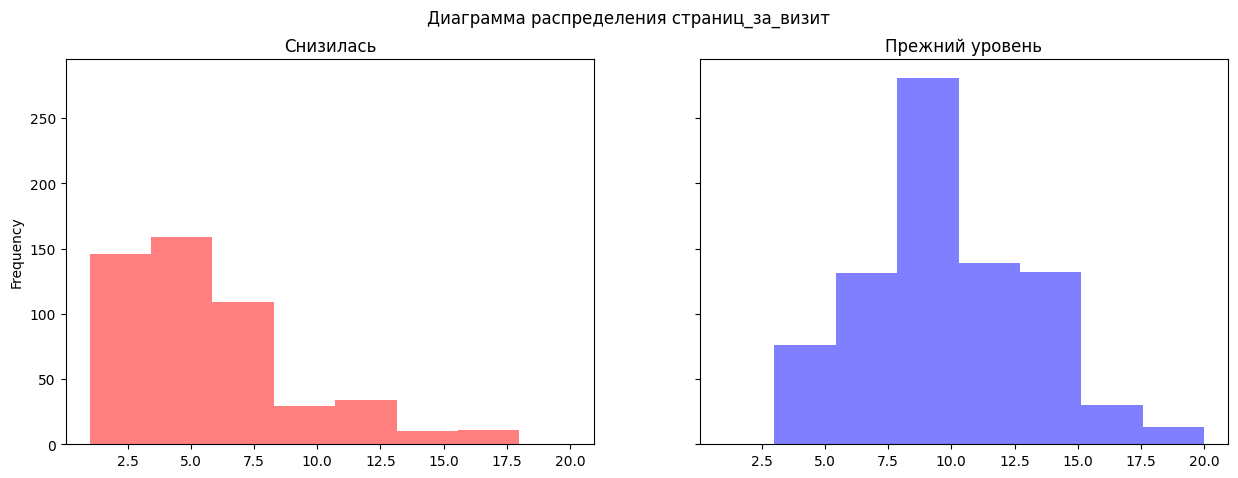

In [78]:
graf_1(market_file, 'страниц_за_визит', 7, 7)

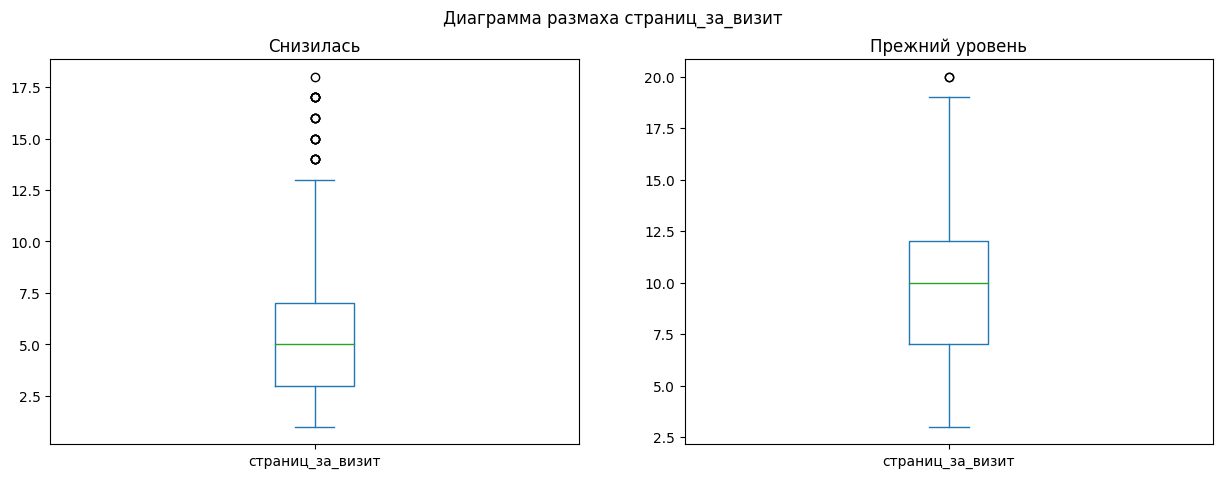

In [79]:
graf_2(market_file, 'страниц_за_визит')

Очевидно, что клиенты у которых упала покупательская активность посещают меньше страниц за один визит. Медианное значение для клиентов группы `снизилась` в два раза меньше чем для клиентов группы `прежний уровень`. Либо они покупают меньше, потому что заходят на меньшее количество страниц, либо они заходят на меньшее количество страниц потому что решили покупать меньше. Есть выпадающие значения, но их не так много.

In [81]:
# Выведем описательные статистики числовых столбцов таблицы с данными о клиентах у которых снизилась активность
# разделим данные по граничному значению 13
analys_1(market_file_bad, 'страниц_за_визит', 13)

,выбросы,норма
id,215826.0,215586.00
маркет_актив_6_мес,4.4,3.90
маркет_актив_тек_мес,4.0,4.00
длительность,591.0,637.00
акционные_покупки,0.2,0.32
средний_просмотр_категорий_за_визит,3.0,2.00
неоплаченные_продукты_штук_квартал,4.0,4.00
ошибка_сервиса,4.0,4.00
страниц_за_визит,16.0,5.00


Медианые показатели в таблице с клиентами у которых упала активность, но посещений страниц за визит больше 13 мало отличаются кроме столбца `страниц_за_визит`. Заполним выбросы медианным значением `страниц_за_визит`  из таблицы без выбросов.  

In [83]:
market_file_bad['страниц_за_визит'][market_file_bad['страниц_за_визит'] > 13] = 5

/var/folders/zx/qq3kbs2s4w78x4kxp2lrj54m0000gn/T/ipykernel_5606/951906579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_file_bad['страниц_за_визит'][market_file_bad['страниц_за_визит'] > 13] = 5


In [84]:
market_file_bad.loc[market_file_bad['страниц_за_визит'] > 13]['страниц_за_визит'].count()

0

С выбросами в столбце разобрались. Посмотрим выбросы для таблицы с данными о клиентах с прежней покупательской активностью.

In [86]:
market_file_good.loc[market_file_good['страниц_за_визит'] > 17]['страниц_за_визит'].count()

13

В market_file_good всего 13 строк, в которых в столбце `страниц_за_визит` находится значение больше 17. 

In [88]:
# Выведем описательные статистики числовых столбцов таблицы с данными о клиентах у которых снизилась активность
# разделим данные по граничному значению 17
analys_1(market_file_good, 'страниц_за_визит', 17)

,выбросы,норма
id,216342.00,216245.00
маркет_актив_6_мес,4.20,4.40
маркет_актив_тек_мес,4.00,4.00
длительность,503.00,591.00
акционные_покупки,0.23,0.21
средний_просмотр_категорий_за_визит,3.00,4.00
неоплаченные_продукты_штук_квартал,3.00,2.00
ошибка_сервиса,5.00,4.00
страниц_за_визит,19.00,9.00


Можно считать, что значения больше 17 выбросы, заполним их медианным из таблицы без выбросов.

In [90]:
market_file_good.loc[:, 'страниц_за_визит'][market_file_good['страниц_за_визит'] > 17] = 9

/var/folders/zx/qq3kbs2s4w78x4kxp2lrj54m0000gn/T/ipykernel_5606/149775481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_file_good.loc[:, 'страниц_за_визит'][market_file_good['страниц_за_визит'] > 17] = 9


In [91]:
market_file_bad.loc[market_file_bad['страниц_за_визит'] > 17]['страниц_за_визит'].count()

0

Замена прошла успешно.

#### Исслудем значения в столбце `неоплаченные_продукты_штук_квартал` в каждой группе.

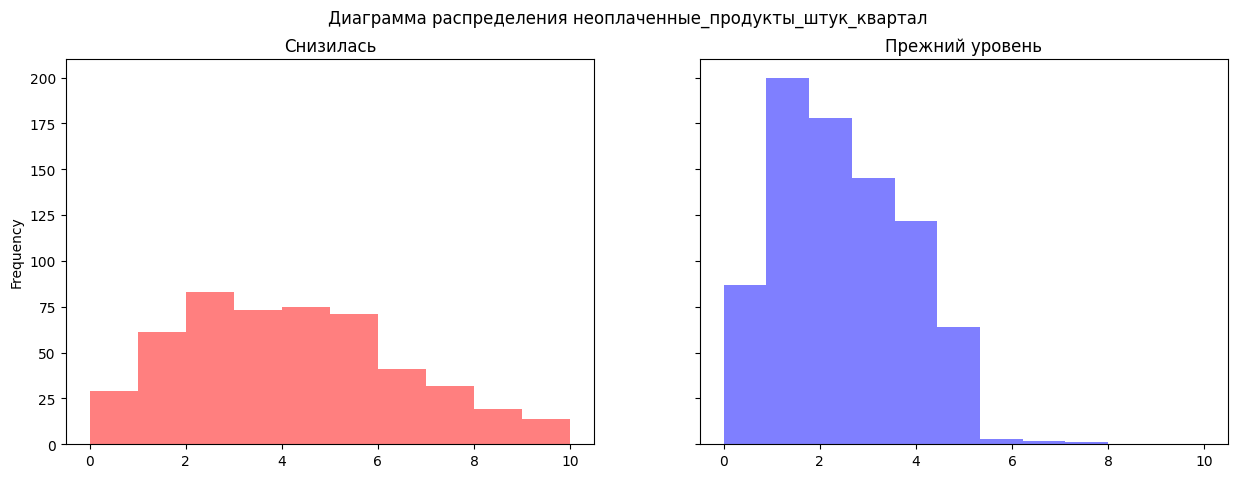

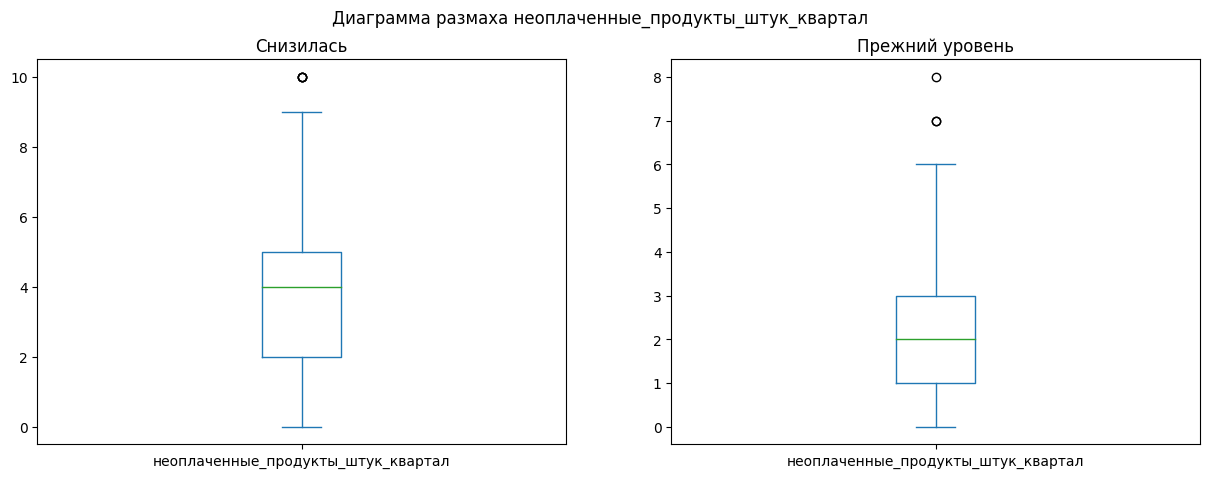

In [94]:
graf_1(market_file, 'неоплаченные_продукты_штук_квартал', 10, 9)
graf_2(market_file, 'неоплаченные_продукты_штук_квартал')

In [95]:
# Разделим market_file_bad на две таблице с границей 9 в столбце 'неоплаченные_продукты_штук_квартал', посмотрим
# на медианные значения в столбах
analys_1(market_file_bad, 'неоплаченные_продукты_штук_квартал', 9)

,выбросы,норма
id,215495.00,215598.50
маркет_актив_6_мес,3.45,3.90
маркет_актив_тек_мес,4.00,4.00
длительность,523.00,637.00
акционные_покупки,0.27,0.31
средний_просмотр_категорий_за_визит,1.00,2.00
неоплаченные_продукты_штук_квартал,10.00,4.00
ошибка_сервиса,3.50,4.00
страниц_за_визит,4.50,5.00


Неоплаченных продуктов сильно больше, но при этом по всем остальным столбцам разница не столь большая. Разве что медианная длительность отличается больше чем на 100 дней. 
Заменим все значения больше 9 на медианное из нормы.

In [97]:
market_file_bad.loc[:, 'неоплаченные_продукты_штук_квартал'][
    market_file_bad['неоплаченные_продукты_штук_квартал'] > 9
] = 4

/var/folders/zx/qq3kbs2s4w78x4kxp2lrj54m0000gn/T/ipykernel_5606/843003129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_file_bad.loc[:, 'неоплаченные_продукты_штук_квартал'][


In [98]:
market_file_bad.loc[:, 'неоплаченные_продукты_штук_квартал'][
    market_file_bad['неоплаченные_продукты_штук_квартал'] > 9
].count()

0

In [99]:
# Разделим market_file_good на две таблице с границей 6 в столбце 'неоплаченные_продукты_штук_квартал', посмотрим
# на медианные значения в столбах
analys_1(market_file_good, 'неоплаченные_продукты_штук_квартал', 6)

,выбросы,норма
id,216561.00,216245.00
маркет_актив_6_мес,4.90,4.40
маркет_актив_тек_мес,4.00,4.00
длительность,842.00,589.00
акционные_покупки,0.28,0.21
средний_просмотр_категорий_за_визит,2.00,4.00
неоплаченные_продукты_штук_квартал,7.00,2.00
ошибка_сервиса,5.00,4.00
страниц_за_визит,9.00,9.00


Длительность сильно отличается, также медианное значение просмотра категорий за визит в два раза больше для строк с выбросами, в остальных столбах разница не такая ощутимая. Заменим выбросы в столбце `неоплаченные_продукты_штук_квартал` на медианное из нормы.

In [101]:
market_file_good.loc[:, 'неоплаченные_продукты_штук_квартал'][
    market_file_good['неоплаченные_продукты_штук_квартал'] > 6
] = 2

/var/folders/zx/qq3kbs2s4w78x4kxp2lrj54m0000gn/T/ipykernel_5606/3930562416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_file_good.loc[:, 'неоплаченные_продукты_штук_квартал'][


In [102]:
market_file_good.loc[:, 'неоплаченные_продукты_штук_квартал'][
    market_file_good['неоплаченные_продукты_штук_квартал'] > 6
].count()

0

Выбросов больше нет!

#### Исслудем значения в столбце `средний_просмотр_категорий_за_визит` в каждой группе.

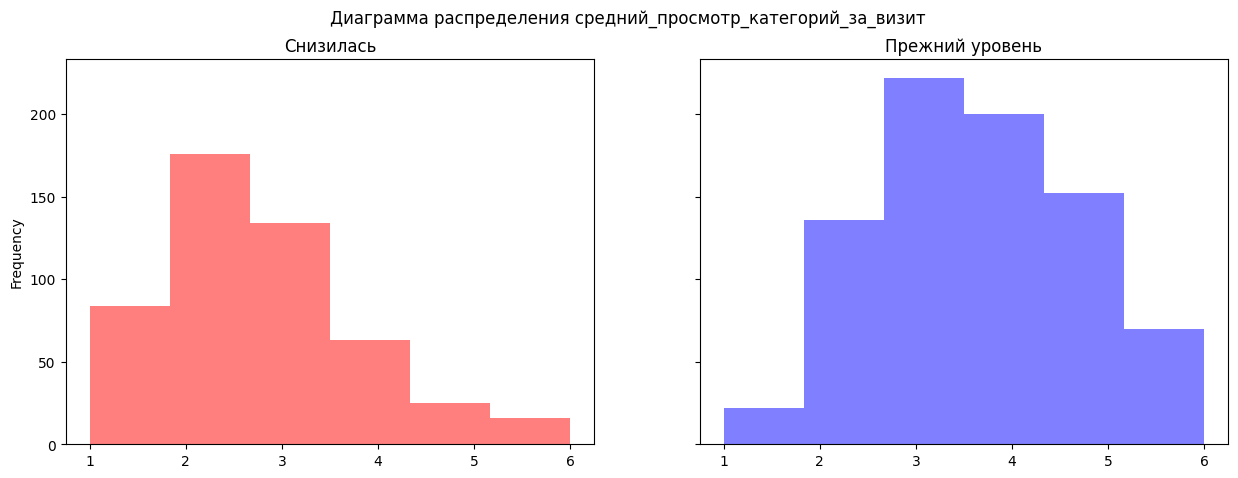

In [105]:
graf_1(market_file, 'средний_просмотр_категорий_за_визит', 6, 6)

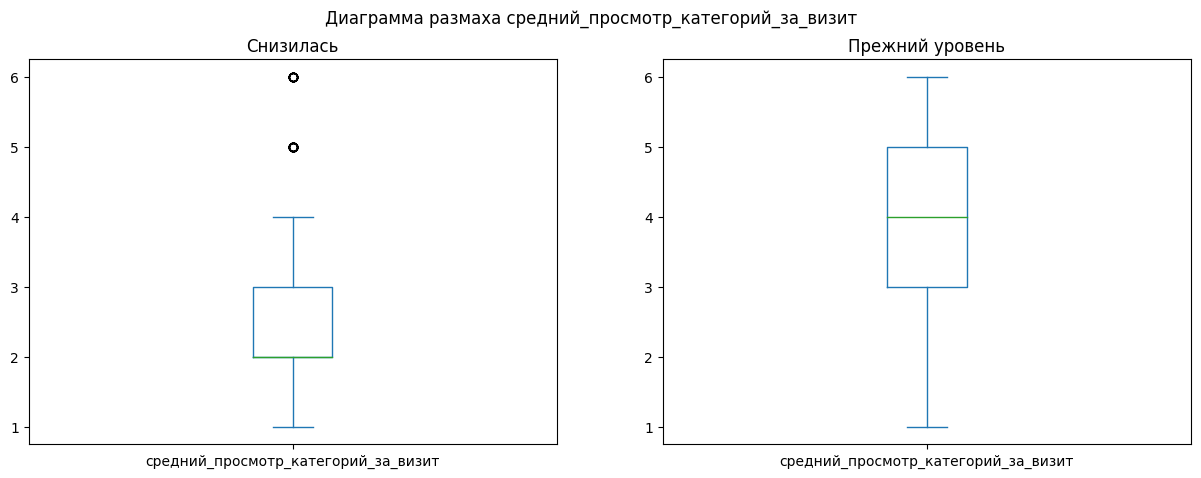

In [106]:
graf_2(market_file, 'средний_просмотр_категорий_за_визит')

In [107]:
# Разделим market_file_bad на две таблице с границей 4 в столбце 'средний_просмотр_категорий_за_визит', посмотрим
# на медианные значения в столбах
analys_1(market_file_bad, 'средний_просмотр_категорий_за_визит', 4)

,выбросы,норма
id,215487.00,215602.00
маркет_актив_6_мес,4.10,3.90
маркет_актив_тек_мес,4.00,4.00
длительность,488.00,657.00
акционные_покупки,0.29,0.31
средний_просмотр_категорий_за_визит,5.00,2.00
неоплаченные_продукты_штук_квартал,2.00,4.00
ошибка_сервиса,4.00,4.00
страниц_за_визит,5.00,5.00


In [108]:
market_file_bad.query('средний_просмотр_категорий_за_визит > 4')[
    ['средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал'
    ]
].describe()

,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал
count,41.000000,41.000000
mean,5.390244,2.707317
std,0.493865,2.347806
min,5.000000,0.000000
25%,5.000000,1.000000
50%,5.000000,2.000000
75%,6.000000,4.000000
max,6.000000,9.000000


In [109]:
market_file_bad.loc[:,['средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал']].describe()

,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал
count,498.000000,498.000000
mean,2.632530,3.672691
std,1.229871,2.216478
min,1.000000,0.000000
25%,2.000000,2.000000
50%,2.000000,4.000000
75%,3.000000,5.000000
max,6.000000,9.000000


Клиенты, у которых снизилась активность, сильно чаще просматривают в среднем 2 категории за визит. Можно заметить интересную закономерность, те клиенты, которые в среднем просматривают более 4 категорий за визит, имеют в среднем меньше неоплаченных продуктов за квартал, чем в среднем все клиенты у которых снизилась активность. Не будем заменять значения в столбце `средний_просмотр_категорий_за_визит`.

In [111]:
market_file_good.loc[:,['средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал']].describe()

,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал
count,802.000000,802.000000
mean,3.665835,2.273067
std,1.277112,1.476067
min,1.000000,0.000000
25%,3.000000,1.000000
50%,4.000000,2.000000
75%,5.000000,3.000000
max,6.000000,6.000000


Медианное значение количества просмотров категорий за визит у клиентов с прежней активностью равно 4, это в два раза больше чем у клиентов у которых активность просела.

#### Исслудем значения в столбце `маркет_актив_6_мес` в каждой группе.

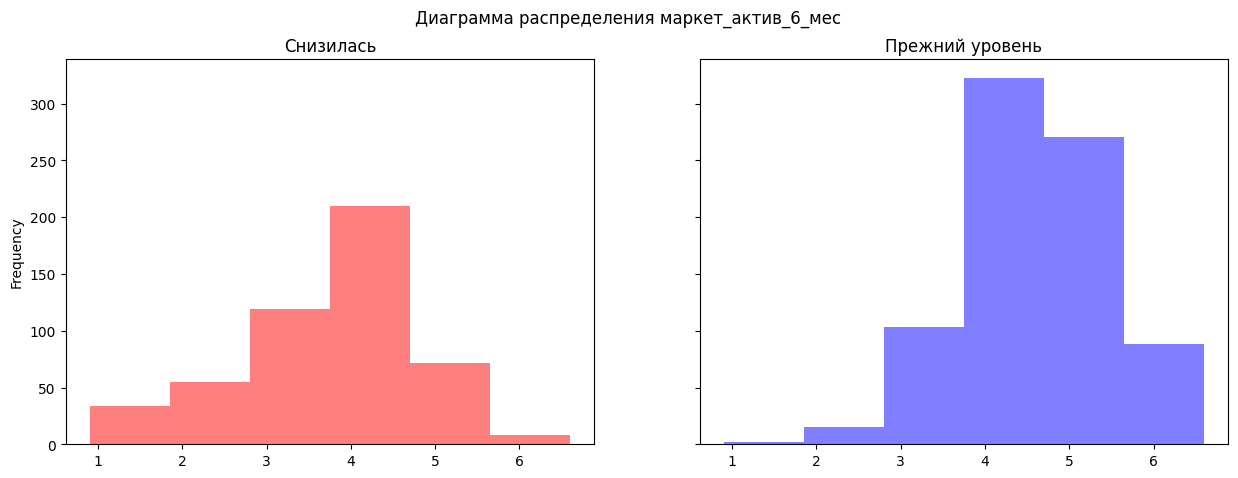

In [114]:
graf_1(market_file, 'маркет_актив_6_мес', 6, 6)

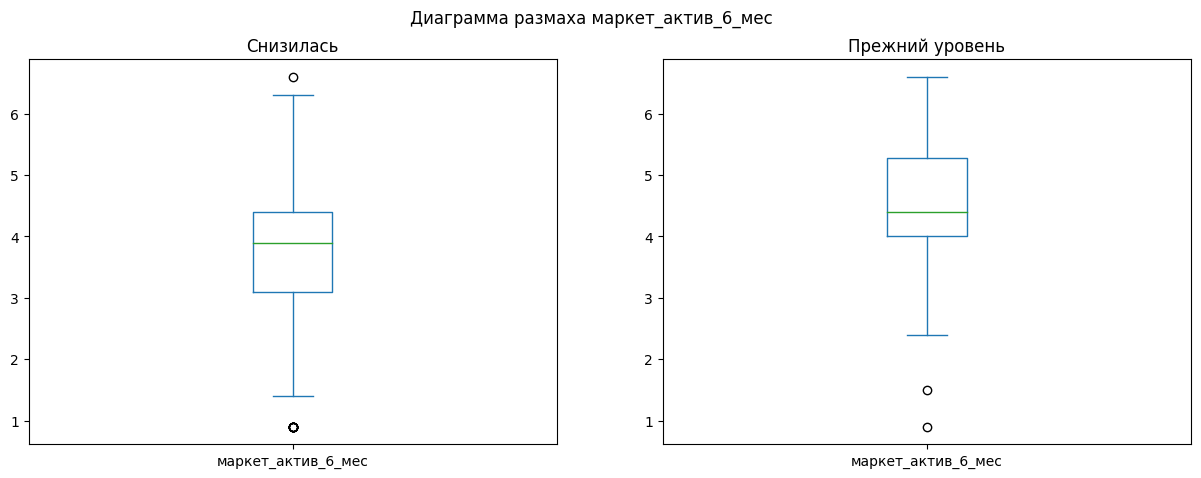

In [115]:
graf_2(market_file, 'маркет_актив_6_мес')

In [116]:
market_file_bad['маркет_актив_6_мес'].describe()

count    498.000000
mean       3.744378
std        1.053374
min        0.900000
25%        3.100000
50%        3.900000
75%        4.400000
max        6.600000
Name: маркет_актив_6_мес, dtype: float64

In [117]:
market_file_good['маркет_актив_6_мес'].describe()

count    802.000000
mean       4.570075
std        0.848618
min        0.900000
25%        4.000000
50%        4.400000
75%        5.275000
max        6.600000
Name: маркет_актив_6_мес, dtype: float64

Можно сказать, что группа у которой сохранился прежний уровень активности получала больше рассылок за последние 6 месяцев.  Больше медианное и среднее значение, также 75% клиентов из группы с прежнем уровнем активнсти получали 4 и более рекламных рассылок в среднем, когда в категории со сниженным уровнем активности процент таких клиентов меньше 50%.

#### Исслудем значения в столбце `акционные_покупки` в каждой группе.

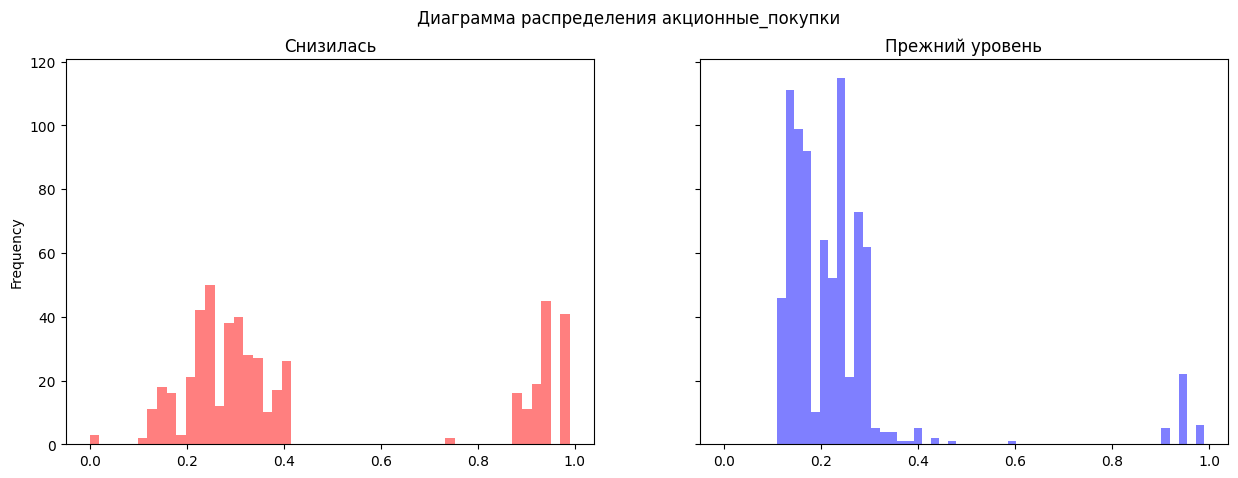

In [120]:
graf_1(market_file, 'акционные_покупки', 50, 50)

Видно, что в обеих группах есть клиенты, которые стараются покупать только товары по акции. Причем в группе клиентов у которых снизилась актвиность, количество таких клиентов сопоставимо с клиентами, которые покупают по акциям не более 50% процентов товара.

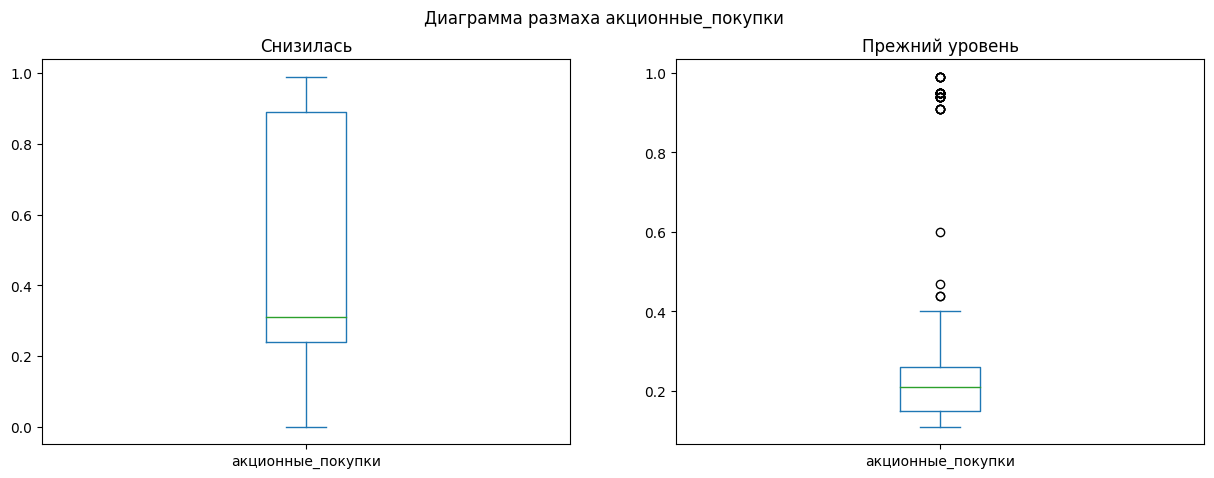

In [122]:
graf_2(market_file, 'акционные_покупки')

In [123]:
# Разделим market_file_good на две таблице с границей 0.4 в столбце 'акционные_покупки', посмотрим
# на медианные значения в столбах
analys_1(market_file_good, 'акционные_покупки', 0.4)

,выбросы,норма
id,216445.00,216232.00
маркет_актив_6_мес,4.30,4.40
маркет_актив_тек_мес,4.00,4.00
длительность,514.00,593.00
акционные_покупки,0.95,0.21
средний_просмотр_категорий_за_визит,3.00,4.00
неоплаченные_продукты_штук_квартал,2.00,2.00
ошибка_сервиса,5.00,4.00
страниц_за_визит,9.00,9.00


In [124]:
market_file_good.query('акционные_покупки > 0.4')['акционные_покупки'].count()

37

У покупателей с прежним уровнем активности наблюдаются выбросы в столбце `акционные_покупки`. У 37 клиентов медианное значения доли акционных покупок составляет 0.95, что на 0.74 больше медианы для большей части клиентов. При этом в остальных столбцах разница незначительная. Заменим выбросы на медианное значение.

In [126]:
market_file_good.loc[:, 'акционные_покупки'][
    market_file_good['акционные_покупки'] > 0.4
] = 0.21

/var/folders/zx/qq3kbs2s4w78x4kxp2lrj54m0000gn/T/ipykernel_5606/3382667920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_file_good.loc[:, 'акционные_покупки'][


In [127]:
market_file_good['акционные_покупки'].describe()

count    802.000000
mean       0.206584
std        0.060582
min        0.110000
25%        0.150000
50%        0.210000
75%        0.250000
max        0.400000
Name: акционные_покупки, dtype: float64

От выбрасов избавились! 

In [129]:
market_file_bad['акционные_покупки'].describe()

count    498.000000
mean       0.450964
std        0.306011
min        0.000000
25%        0.240000
50%        0.310000
75%        0.890000
max        0.990000
Name: акционные_покупки, dtype: float64

Очевидно, что клиенты активность которых снизилась, чаще покупают акционные товары. Несмотря на то, что медианное значение отличается всего на 10%, от клиентов с прежним уровнем активности, мы видим куда больший разброс значений. 25% клиентов из этой группы покупают почти всегда акционные товары (9 из 10). 

#### Рассмотрим столбец `длительность` в разрерзе целевого признака.

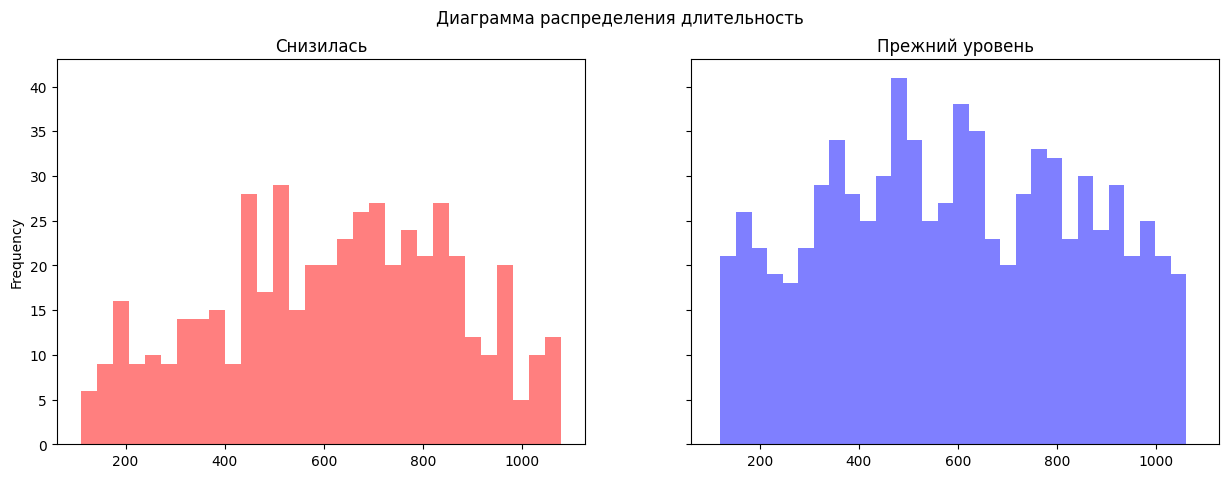

In [132]:
graf_1(market_file, 'длительность', 30, 30)

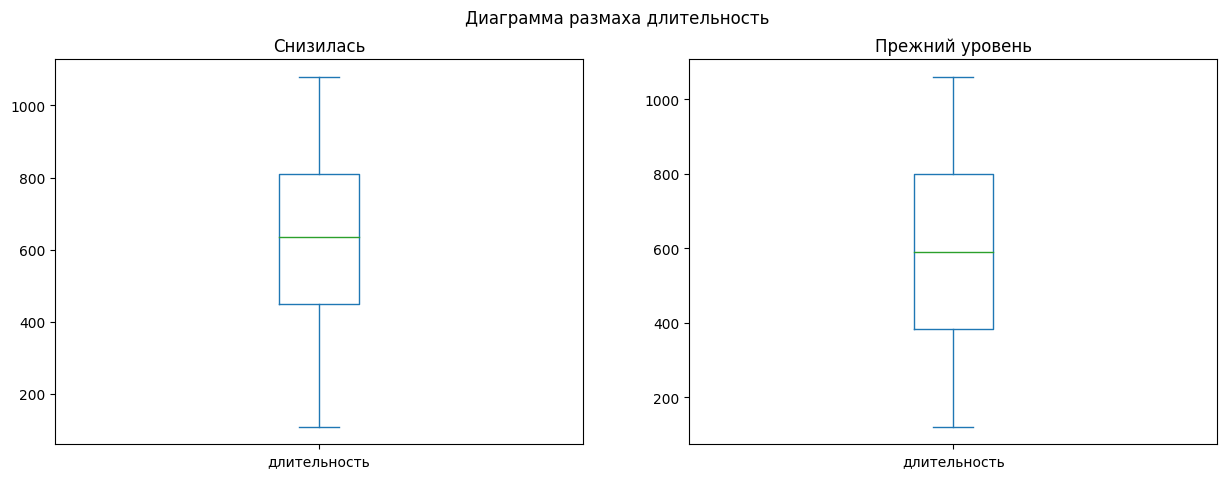

In [133]:
graf_2(market_file, 'длительность')

В столбце выбросов нет, похоже давность регистрации никак не влияет на снижение активности. Гистограммы и диаграммы размаха очень похожи друг на друга.

#### Исследуем категориальные столбцы.

In [136]:
# создадим список с названиями категориальных столбцов
cat = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

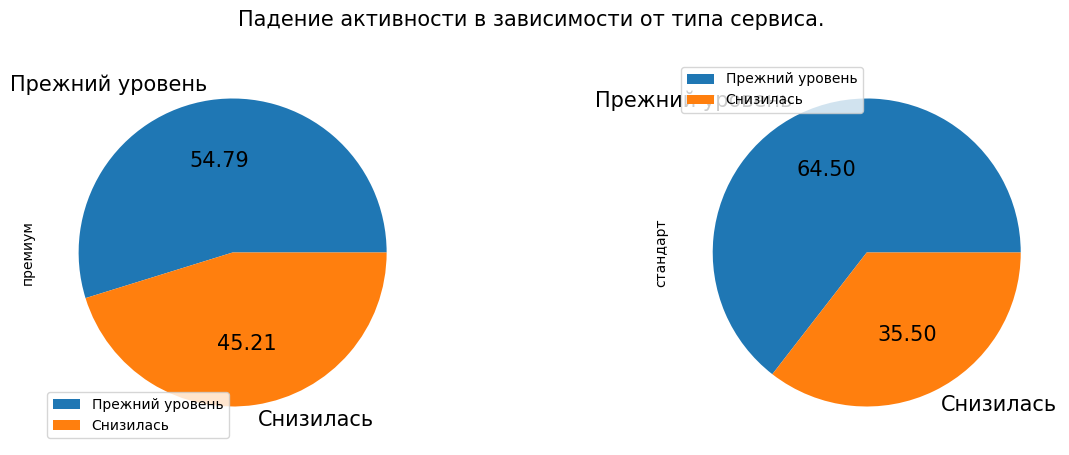

In [137]:
# сделаем сводную таблицу и построим круговые диаграммы
market_file.pivot_table(index='покупательская_активность', columns= 'тип_сервиса',  values='id', aggfunc='count').\
plot(kind='pie', subplots=True,  autopct="%.2f",fontsize=15, figsize=(15, 5))
plt.suptitle('Падение активности в зависимости от типа сервиса.'+"\n", fontsize=15)
plt.show()

Доля клиентов премиум сегмента, которые стали менее активны на 10% больше чем доля клиентов с подпиской стандарт, активность которых упала. Посмотрим, как распределены клиенты по сегментам.

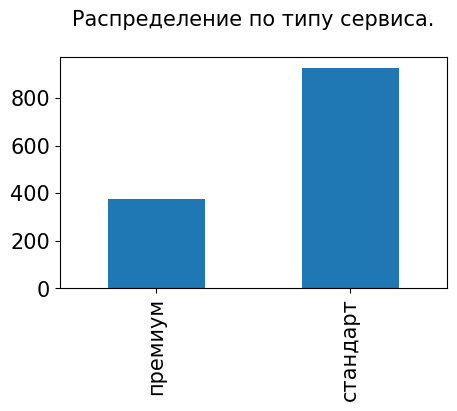

In [139]:
market_file.groupby(by='тип_сервиса')['тип_сервиса'].count().plot(
    kind='bar', fontsize=15, figsize=(5, 3), label=False
)
plt.xlabel('')
plt.title('Распределение по типу сервиса.'+'\n', fontsize=15)
plt.show()

Клиентов в сегменте стандарт более чем два раза больше. Это стоит учесть в дальнейшей работе.

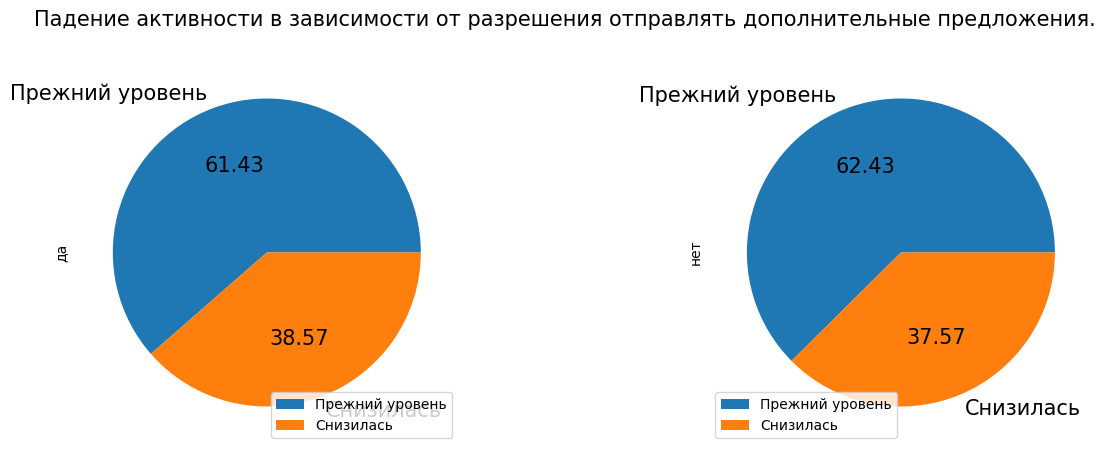

In [141]:
market_file.pivot_table(index='покупательская_активность', columns= 'разрешить_сообщать',  values='id', aggfunc='count').\
plot(kind='pie', subplots=True,  autopct="%.2f",fontsize=15, figsize=(15, 5))
plt.suptitle('Падение активности в зависимости от разрешения отправлять дополнительные предложения.'+"\n",\
             fontsize=15)
plt.show()

Разрешение отправлять дополнительные предложения никак не влияет на активность клиентов. Доли клиентов, у которых снизилась активность в обоих категориях почти одинаковая.

In [143]:
# получим сводную таблицу с данными по популярным категориям
market_file_1 = market_file.pivot_table(
    index='покупательская_активность', columns= 'популярная_категория',  values='id', aggfunc='count'
)
market_file_1.columns = ['Домашний текстиль', 'Косметика и аксесуары', 
                         'Кухонная посуда', 'Мелкая бытовая техника и электроника', 
                         'Техника для красоты и здоровья', 'Товары для детей'
]
market_file_1 = market_file_1 / market_file_1.sum()


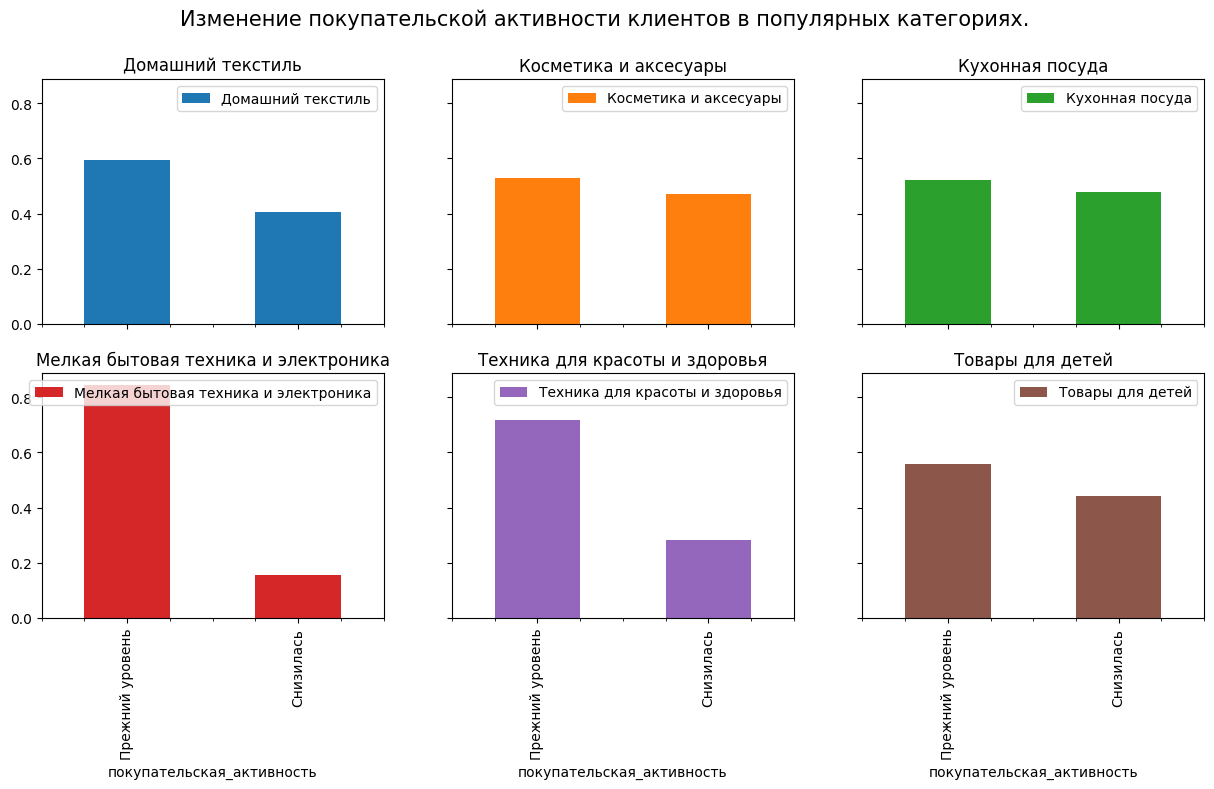

In [144]:
# Построим столбчатые диаграммы по попоулярным категориям
market_file_1.plot(
    kind='bar', subplots=True, figsize=(15, 7), label=False, layout=(2, 3), 
    sharex=True, sharey=True, bottom=False, left=False
)

plt.suptitle('Изменение покупательской активности клиентов в популярных категориях.'+'\n', fontsize=15)

plt.show()

Мы видим, что в трех категориях активность почти половины клиентов снизилась. Это категории:
- товары для детей;
- косметика и аксессуары;
- кухонная посуда. 

Также довольна большая доля клиентов, у которых снизилась активность в категории `домашний текстиль`.
Посмотрим, как в целом распределены популярные категории.

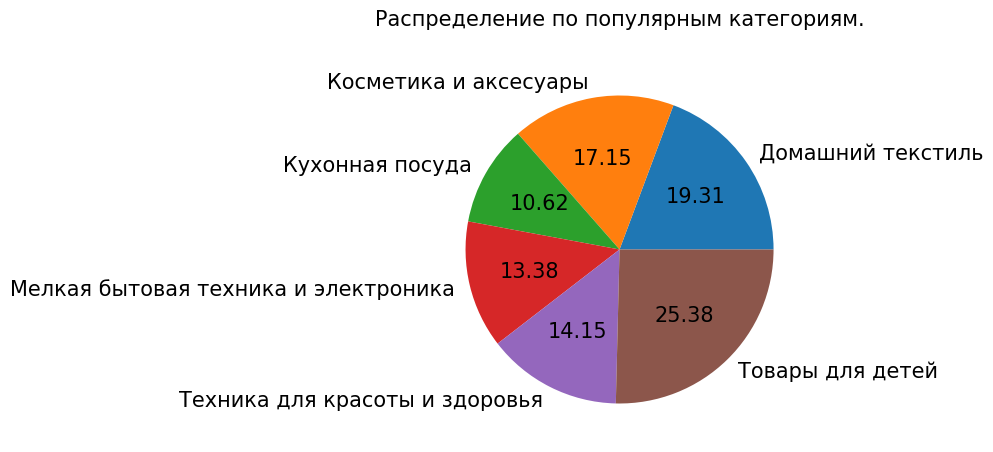

In [146]:
market_file.groupby(by='популярная_категория')['популярная_категория'].count().plot(
   kind='pie', subplots=True,  autopct="%.2f",fontsize=15, figsize=(15, 5)
)
plt.ylabel('')
plt.title('Распределение по популярным категориям.'+'\n', fontsize=15)
plt.show()

За последние 6 месяцев самая популярная категория, товары для детей!

### Проведем исследовательский анализ таблицы `market_money`.

Еще раз вспоним, как выглядит таблица `market_money`.

In [150]:
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Единственный числовой столбец - `выручка`. Изучим числовое описание столбца.

In [152]:
market_money['выручка'].describe().round(2)

count      3900.00
mean       5025.70
std        1777.70
min           0.00
25%        4590.15
50%        4957.50
75%        5363.00
max      106862.20
Name: выручка, dtype: float64

Макстмальное значение выручки на два порядка выбивается. Посмотрим, как много значений больше 100000 в столбце.

In [154]:
market_money.query('выручка > 100000').count()

id         1
период     1
выручка    1
dtype: int64

Такое значение одно, найдем id покупателя и изучим его более подробно.

In [156]:
market_money.query('выручка > 10000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [157]:
market_money.query('id == 215380')

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


In [158]:
market_file.query('id == 215380')

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


Похоже, в этом месяца была совершена большая покупка, во все остальные месяцы траты не выглядят подозрительно. Заполним данную строку медианным значением, чтобы не искажать картину.

In [160]:
market_money.loc[(market_money['id'] == 215380)&(market_money['период'] == "текущий_месяц"), 'выручка'] = 4957.5

In [161]:
market_money.query('id == 215380')

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,4957.5


Также изучим клиентов, которые ничего не покупали хоти бы в один из последних трех месяцев.

In [163]:
no_profit = market_money.query('выручка == 0')['id'].unique()
no_profit

array([215348, 215357, 215359])

У нас три таких клиента, исключим их из таблицы.

In [165]:
market_money = market_money.query('id not in @no_profit')
market_money.query('выручка == 0')['id'].unique()

array([], dtype=int64)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


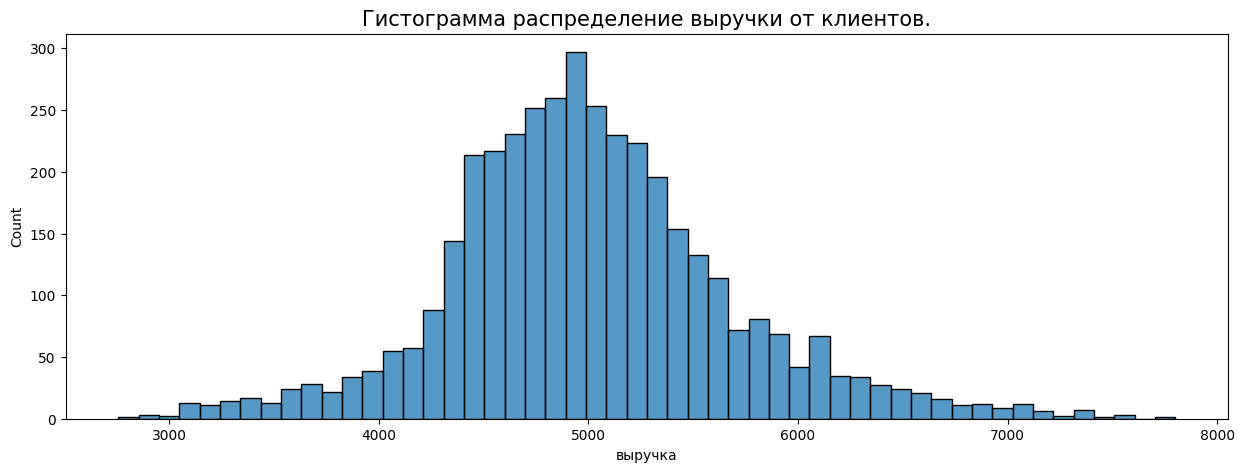

In [166]:
# Построим гистограмму распределения выручки
plt.figure(figsize=(15,5))
sns.histplot(market_money['выручка'])
plt.title('Гистограмма распределение выручки от клиентов.', fontsize=15)
plt.show()

Распределение нормальное, выбросов нет. Посмотрим как будут выглядить гистограммы при распределении клиентов по целевому признаку.

In [168]:
#в good сохраним id клиентов, активность которых не снизилась
good = list(market_file_good['id'])
#в bad сохраним id клиентов, активность которых снизилась
bad = list(market_file_bad['id'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


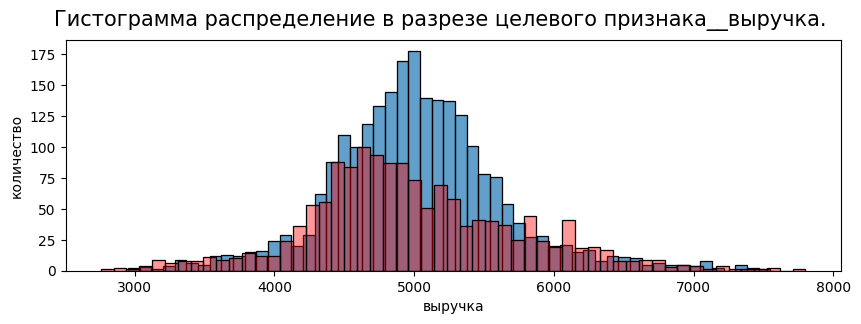

In [169]:
graf_4(market_money, 'выручка', 55)  

Синий график показывает распределение для клиентов, чей уровень активности остался прежним. Красный показывает распределение выручки от клиентов, чей уровень активности снизился. Распределение у обоих графиков нормальное. Медианное значения для клиентов, активность которых снизилась свдинуто левее. Посмторим на описательные статистики для каждой группы.

In [171]:
display(market_money.query('id in @good')['выручка'].describe())
market_money.query('id in @bad')['выручка'].describe()

count    2406.000000
mean     5021.246135
std       623.851770
min      2952.200000
25%      4654.250000
50%      4989.700000
75%      5346.125000
max      7547.800000
Name: выручка, dtype: float64

count    1485.000000
mean     4985.304579
std       759.949963
min      2758.700000
25%      4507.000000
50%      4880.000000
75%      5439.000000
max      7799.400000
Name: выручка, dtype: float64

Среднее для обоих групп мало отличается от медианного значения, также невелико стандартное отклонение. Похоже наши значения довольно однородны.

### Проведем исследовательский анализ таблицы `market_time`.

Еще раз вспомним как выглядит таблица.

In [175]:
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [176]:
market_time['минут'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

Среднее и медианное значение отличаются всего на 0.336, выбросов в данных нет.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


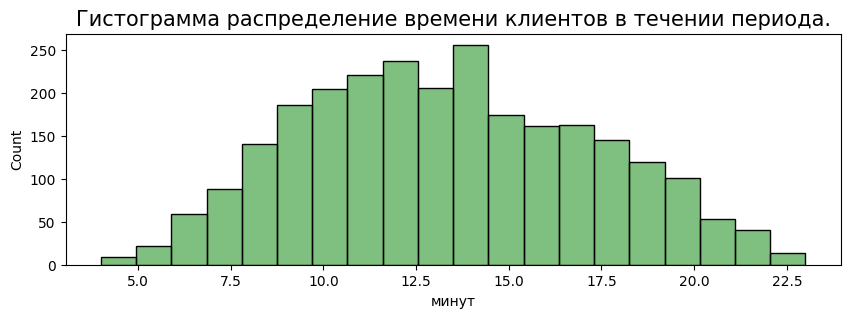

In [178]:
# Построим гистограмму распределения времени на сайте
plt.figure(figsize=(10,3))
sns.histplot(market_time['минут'], bins=20, color='g', alpha=0.5)
plt.title('Гистограмма распределение времени клиентов в течении периода.', fontsize=15)
plt.show()

Посмотрим на время проведенное на сайте в разрезе целевого признака.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


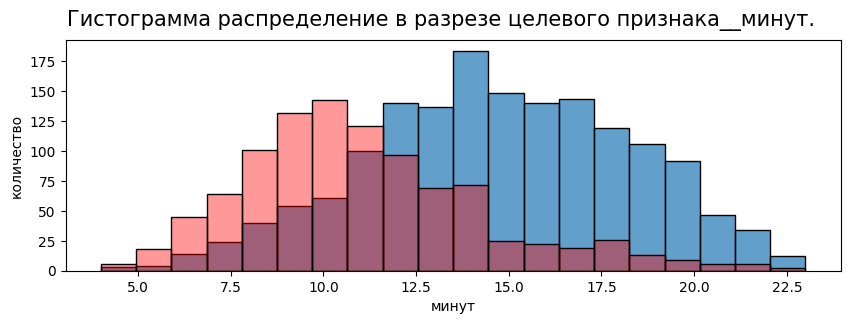

In [180]:
graf_4(market_time, 'минут', 20) 

Клиенты у которых снизилась активность явно проводят меньше времени на сайте.

### Проведем исследовательский анализ таблицы `money`.

In [183]:
money['прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


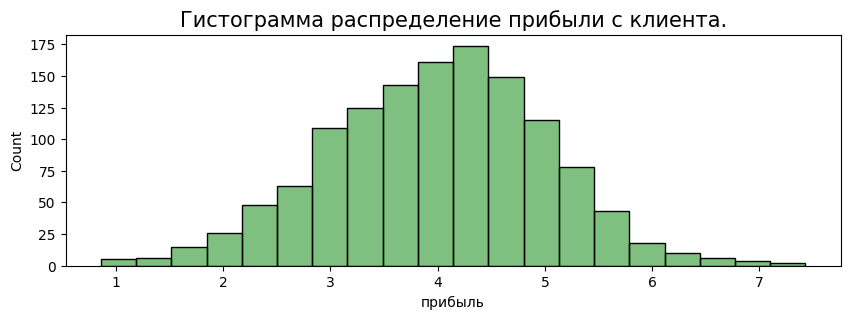

In [184]:
# Построим гистограмму распределения прибыли с клиента
plt.figure(figsize=(10,3))
sns.histplot(money['прибыль'], bins=20, color='g', alpha=0.5)
plt.title('Гистограмма распределение прибыли с клиента.', fontsize=15)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


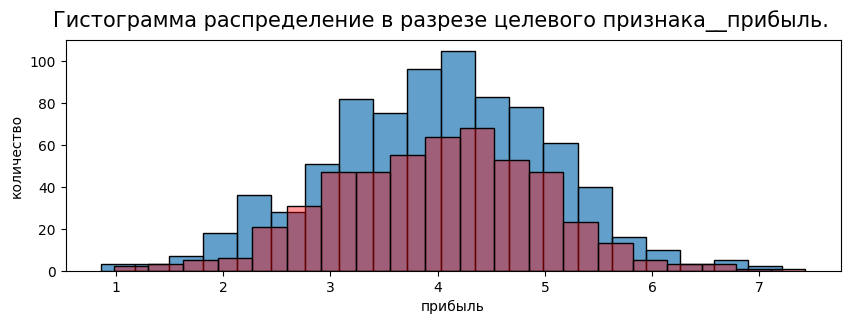

In [185]:
graf_4(money, 'прибыль', 20) 

In [186]:
display(money.query('id in @good')['прибыль'].describe())
money.query('id in @bad')['прибыль'].describe()

count    802.000000
mean       3.995574
std        1.032618
min        0.860000
25%        3.292500
50%        4.040000
75%        4.727500
max        7.210000
Name: прибыль, dtype: float64

count    498.000000
mean       3.998333
std        0.983553
min        0.980000
25%        3.305000
50%        4.050000
75%        4.640000
max        7.430000
Name: прибыль, dtype: float64

Прибыль клиенты в целом приносят одинаковую, медианное значение для обоих групп отличается всего на 0.01, максимум и минимум близки. Разве что клиентов, чья активность снизилась меньше. 

### Подведем итоги.

Отбросим из всех таблиц клиентов, которые ничего не покупали хотя бы в 1 из трех последних месяцев.

In [190]:
market_file = market_file.query('id not in @no_profit').reset_index(drop=True)
market_time = market_time.query('id not in @no_profit').reset_index(drop=True)
money = money.query('id not in @no_profit')

Попробуем составить портрет клиента, снижающего активность:
- посещают меньше страниц за один визит, медианное значение в районе 5;
- чаще откладывают покупки, у них в среднем в два раза больше неоплаченных продуктов;
- за один визит просматривают в два раза меньше категорий в среднем;
- доля клиентов покупающих 90% товаров по акции в данной категории составляет 25%;
- премиум клинты больше подвержены снижению активности 45% против 35.5% в категории стандарт;
- отправка дополнительных предложений не способствует поддержданию активности;
- проводят меньше времени на сайте.

<a id="merging_tables"></a> 
## Объединение таблиц

In [193]:
# Подготовим таблицу по прибыли от каждого клиента в определенный период
market_money_finally = market_money.\
query('период == "препредыдущий_месяц"').drop('период', axis=1).reset_index(drop=True)

market_money_finally["предыдущий_месяц"] = market_money.\
query('период == "предыдущий_месяц"').reset_index(drop=True)['выручка']

market_money_finally['текущий_месяц'] = market_money.\
query('период == "текущий_месяц"').reset_index(drop=True)['выручка']

market_money_finally = market_money_finally.set_index('id')

market_money_finally.columns = ['препред_мес_выручка', 'пред_мес_выручка', 'тек_мес_выручка']

market_money_finally.head()

,препред_мес_выручка,пред_мес_выручка,тек_мес_выручка
id,,,
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5
215353,5124.0,4738.5,5388.5


In [194]:
# Подготовим таблицу по времени проведенному на сайте в определенный период

market_time_finally = market_time.\
query('период == "предыдущий_месяц"').drop('период', axis=1).reset_index(drop=True)

market_time_finally['текущий_месяц'] = market_time.\
query('период == "текущий_месяц"').reset_index(drop=True)['минут']

market_time_finally = market_time_finally.set_index('id')

market_time_finally.columns = ['пред_месяц_мин', 'тек_месяц_мин']
display(market_time_finally.head())
market_time_finally.shape

,пред_месяц_мин,тек_месяц_мин
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10


(1297, 2)

In [195]:
# объеденим все три таблицы
data = [market_money_finally, market_time_finally]

market_file_finally = market_file
market_file_finally = market_file.set_index('id')
market_file_finally = market_file_finally.join(data)
market_file_finally.sample(3)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препред_мес_выручка,пред_мес_выручка,тек_мес_выручка,пред_месяц_мин,тек_месяц_мин
id,,,,,,,,,,,,,,,,,
215367,Снизилась,премиум,да,4.2,4,581,0.40,Товары для детей,5,1,4,1,4668.0,5164.5,5493.4,8,7
215416,Снизилась,стандарт,да,4.2,4,219,0.24,Товары для детей,2,5,7,8,4148.0,4461.5,4882.7,5,8
215526,Снизилась,стандарт,да,3.1,4,572,0.29,Домашний текстиль,1,8,8,5,4508.0,5880.5,6713.8,13,12


**Итоги:**
- перефоматировали таблицу с данными о выручке от каждого клиента, теперь у нас не 3891 строка, а 1297;
- перефоматировали таблицу с данными о времени проведенном на сайте, теперь у нас также 1297 строк;
- во всех таблицах взяли за индекс id клиента;
- объединили таблицы по индексу.


<a id="correlation_analysis"></a> 
## Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.

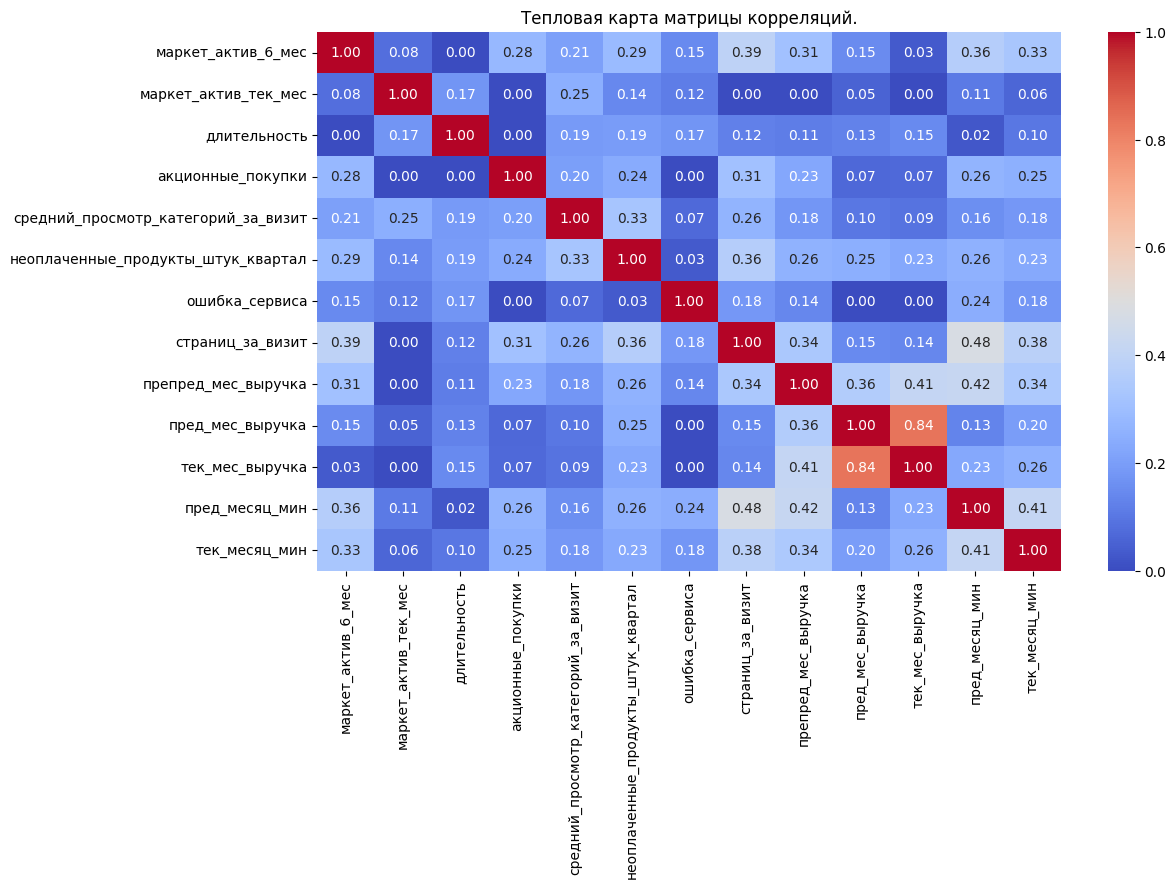

In [199]:
interval_cols=[
        'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
        'акционные_покупки', 'средний_просмотр_категорий_за_визит',
        'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
        'страниц_за_визит', 'препред_мес_выручка', 'пред_мес_выручка',
        'тек_мес_выручка', 'пред_месяц_мин', 'тек_месяц_мин'
    ]
sns.heatmap(market_file_finally[interval_cols].phik_matrix(interval_cols), annot=True, fmt='.2f', cmap='coolwarm')
plt.gcf().set_size_inches(12, 7)
plt.title('Тепловая карта матрицы корреляций.')
plt.show()

Корреляции входных признаков нет, самый большой коэффициент Фи равен 0.84 это еще не так много, чтобы говорить о мультиколлинеарности. Проверим величину множителя, который увеличивает диспрерссию (VIF), для количественных признаков.

In [201]:
vif = pd.DataFrame()
X = market_file_finally.iloc[:, [3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15]].reset_index(drop=True)
X.loc[:,('const')] = 1
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,1.214976,маркет_актив_6_мес
1,1.041753,маркет_актив_тек_мес
2,1.077204,длительность
3,1.179846,акционные_покупки
4,1.159116,средний_просмотр_категорий_за_визит
5,1.196357,неоплаченные_продукты_штук_квартал
6,1.079277,ошибка_сервиса
7,1.414613,страниц_за_визит
8,1.581091,препред_мес_выручка
9,4.220007,пред_мес_выручка


Как мы видим, они все меньше 5. Можно утверждать, что мультикаллинеарности входных признаков нет.

Вывод:
- матрица корреляций не показала коэффициент среди количественных признаков коэффициентов выше чем 0.84;
- VIF для всех количественных входных признаков меньще 5;
- мультикаллинеарности входных признаков нет.

<a id="using_pipelines"></a> 
## Использование пайплайнов

In [205]:
# Закодируем целевой признак. 0 - прежний уровень, 1 - активность снизилась.
market_file_finally.loc[market_file_finally['покупательская_активность']=='Прежний уровень', 'покупательская_активность'] = 0
market_file_finally.loc[market_file_finally['покупательская_активность']=='Снизилась', 'покупательская_активность'] = 1
market_file_finally['покупательская_активность'] = market_file_finally['покупательская_активность'].astype('int')

In [206]:
# изучим датасет на дисбаланс классов
market_file_finally.value_counts('покупательская_активность')

покупательская_активность
0    802
1    495
Name: count, dtype: int64

Объектов класса 1 больше в 1.6 раз. Можно сказать, что дисбаланс классов есть.

In [208]:
# список с названием категориальных столбцов
cat_col_names = market_file_finally.drop(['покупательская_активность'], axis=1).\
select_dtypes(exclude='number').columns.tolist()
# список с названием количественных столбцов
num_col_names =  market_file_finally.drop(['покупательская_активность'], axis=1).\
select_dtypes(include='number').columns.tolist()


In [209]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# загружаем данные
df_full = market_file_finally

X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(['покупательская_активность'], axis=1),
    df_full['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_full['покупательская_активность'])


In [210]:
ohe_columns = cat_col_names
num_columns = num_col_names

In [211]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [212]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [213]:
# создаём итоговый пайплайн: подготовка данных и модель
RANDOM_STATE = 42
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', [DecisionTreeClassifier(random_state=RANDOM_STATE)])
])


Проверим как хорошо предсказывает целевой признак метод к-ближайших соседей.

In [218]:
param_grid = [{
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
]

grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_.round(2))

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred).round(2)}')


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                        

Точность модели ощутимо выросла, 0.89 против 0.8. При этом разница в качестве между валидационной и тренировочной выборкой всего 3%. 
Дальше на очереди логистическая регрессия.

In [220]:
param_grid = [{
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_.round(2))

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred).round(2)}')


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                        

Метрика ROC-AUC стала еще выше, при этом разница в для тренировочной и валидационной выборки составила всего 0.02.


In [222]:
RANDOM_STATE = 42

param_grid = {
    'preprocessor__num': [
        StandardScaler(), 
        MinMaxScaler(), 
        RobustScaler(), 
        'passthrough'
    ],
    'models': [SVC(random_state=RANDOM_STATE)],
    'models__kernel': ['rbf', 'poly'],
    'models__degree': range(1, 8),
    'models__C': range(1,5)
}

grid_search = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred).round(2)}')


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                        

Лучшая модель на тренировочной выборке дала метрику ROC-AUC равную 0.916. На валидационной выборке метрика также лучше, чем в остальных моделях 0.92. Логистическая регрессия предсказывает не сильно хуже, на валидационной выборке разницы нет.

<a id="analysis_of_the_importance"></a>
## Анализ важности признаков

Исследуем важность признаков двух лучших моделей. Начнем с модели логистической регрессии.

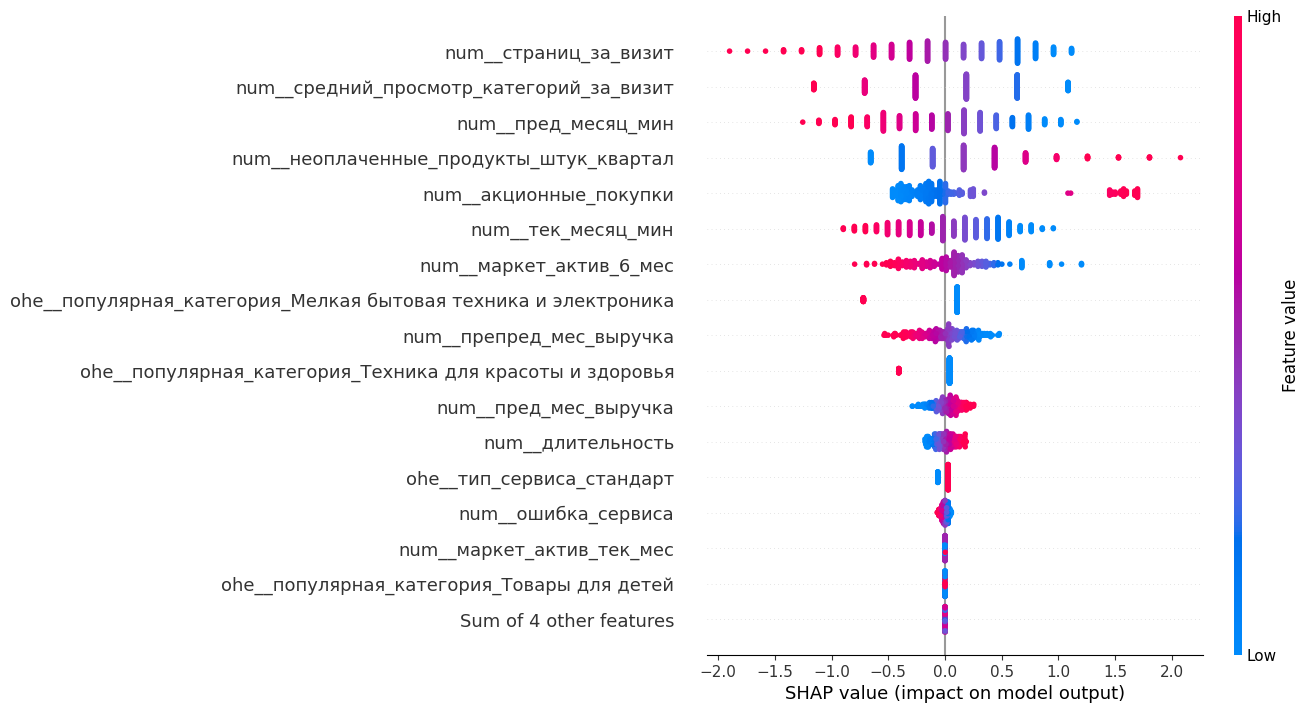

In [226]:
# Выберем модель логистической регрессии с лучшими параметрами.
model = LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear')
# подготовим датафрейм
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_test),
    columns=data_preprocessor.get_feature_names_out()
)

# обучаем модель
model.fit(X_train_p, y_train)


explainer = shap.LinearExplainer(model, X_train_p)
shap_values = explainer(X_test_p)

shap.plots.beeswarm(shap_values, max_display=17) 

In [227]:
X_test_p

,ohe__тип_сервиса_стандарт,ohe__разрешить_сообщать_нет,ohe__популярная_категория_Косметика и аксесуары,ohe__популярная_категория_Кухонная посуда,ohe__популярная_категория_Мелкая бытовая техника и электроника,ohe__популярная_категория_Техника для красоты и здоровья,ohe__популярная_категория_Товары для детей,num__маркет_актив_6_мес,num__маркет_актив_тек_мес,num__длительность,num__акционные_покупки,num__средний_просмотр_категорий_за_визит,num__неоплаченные_продукты_штук_квартал,num__ошибка_сервиса,num__страниц_за_визит,num__препред_мес_выручка,num__пред_мес_выручка,num__тек_мес_выручка,num__пред_месяц_мин,num__тек_месяц_мин
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.771930,1.0,0.322034,0.909091,0.0,0.1,0.000000,0.315789,0.695937,0.525223,0.515684,0.588235,0.842105
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561404,0.0,0.724576,0.125000,0.4,0.3,0.444444,0.210526,0.518349,0.724560,0.515073,0.411765,0.210526
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.526316,1.0,0.297669,0.102273,0.4,0.1,0.555556,0.684211,0.819135,0.623378,0.446813,0.705882,0.473684
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.649123,1.0,0.173729,0.147727,0.0,0.3,0.333333,0.105263,0.507208,0.556645,0.513580,0.411765,0.526316
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.456140,0.5,0.470339,0.329545,0.2,0.4,0.111111,0.157895,0.117955,0.359470,0.193713,0.352941,0.421053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.543860,1.0,1.000000,0.329545,0.6,0.2,0.333333,0.105263,0.420708,0.005477,0.222071,0.294118,0.315789
321,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.561404,0.0,0.083686,0.022727,0.8,0.2,0.111111,0.473684,0.692005,0.609398,0.464376,0.411765,0.210526
322,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.438596,1.0,0.348517,0.897727,0.2,0.4,0.222222,0.052632,0.291612,0.156241,0.104178,0.352941,0.315789
323,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.543860,0.0,0.402542,0.159091,0.2,0.6,0.333333,0.631579,0.490826,0.426348,0.443939,0.470588,0.315789


Мы видим, что в данной модели высокую значимость имеет количество просмотренных категорий за визит. Чем больше категорий просматривает пользователь, тем выше вероятность принадлежности к классу 0 (активность не изменится). Количество страниц за визит и время проведенное в предыдущем месяце также склоняет предсказать класс 0 при большом значении признака. Чем больше акционных покупок и неоплаченных товаров, тем больше вероятность, что модель предскажет класс 1 (активность снизится).

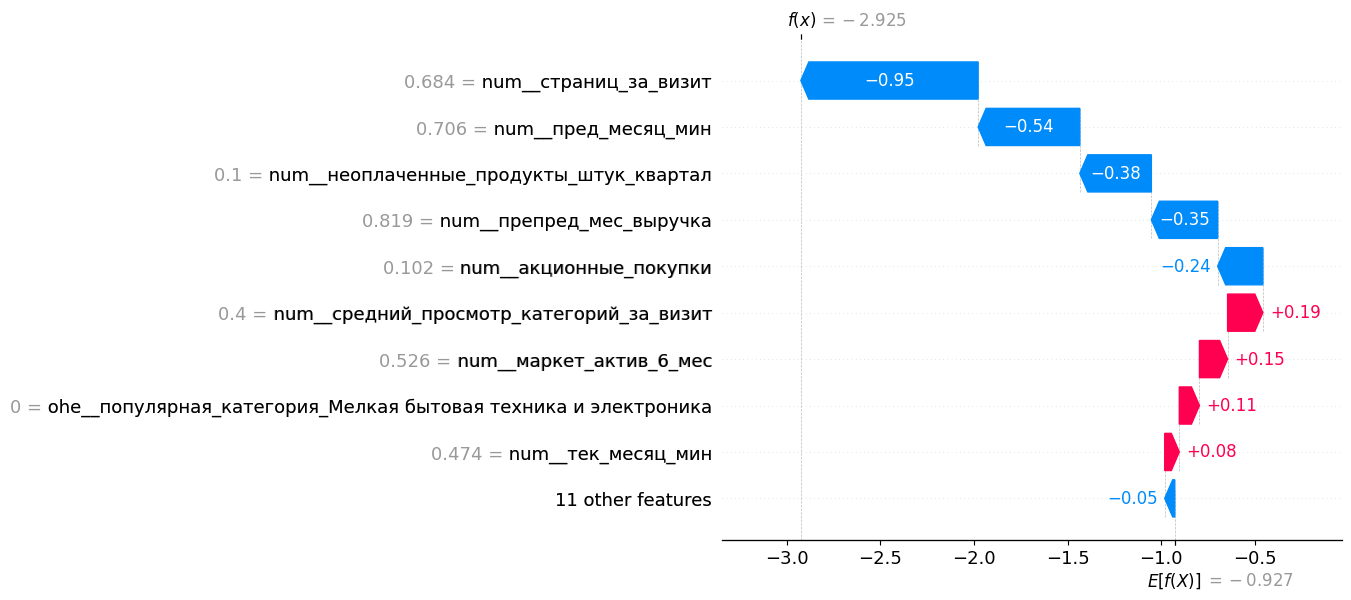

In [229]:
# построим график для второго объекта
shap.plots.waterfall(shap_values[2]) 

Количество просмотренных страниц за визит перетягивает предсказание в сторону класса "0". 

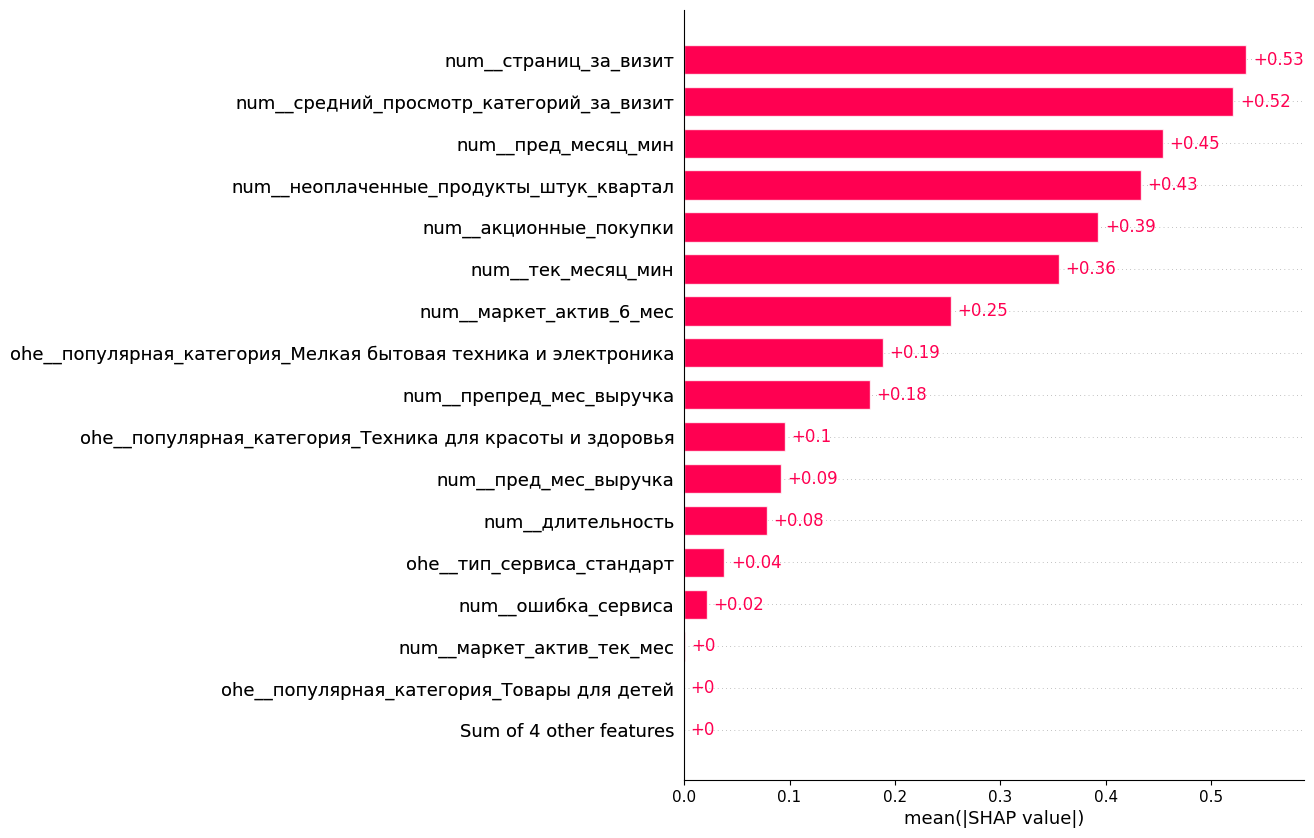

In [231]:
shap.plots.bar(shap_values, max_display=17)

Самый большой вес у двух признаков `средний_просмотр_категорий_за_визит` и `страниц_за_визит`. Эти два признака сильнее остальных влияют на предсказание модели. 

Изучим важность признаков метода опорных векторов.

In [234]:
model_1 = SVC(C=1, degree=1, random_state=42, probability=True)

model_1.fit(X_train_p.values, y_train)

# Создание объекта KernelExplainer с вероятностями для одного класса
explainer = shap.KernelExplainer(lambda x: model_1.predict_proba(x)[:, 1], shap.sample(X_train_p, 10))

# Рассчет SHAP значений для тестовых данных
shap_values = explainer(shap.sample(X_test_p, 10))

  0%|          | 0/10 [00:00<?, ?it/s]

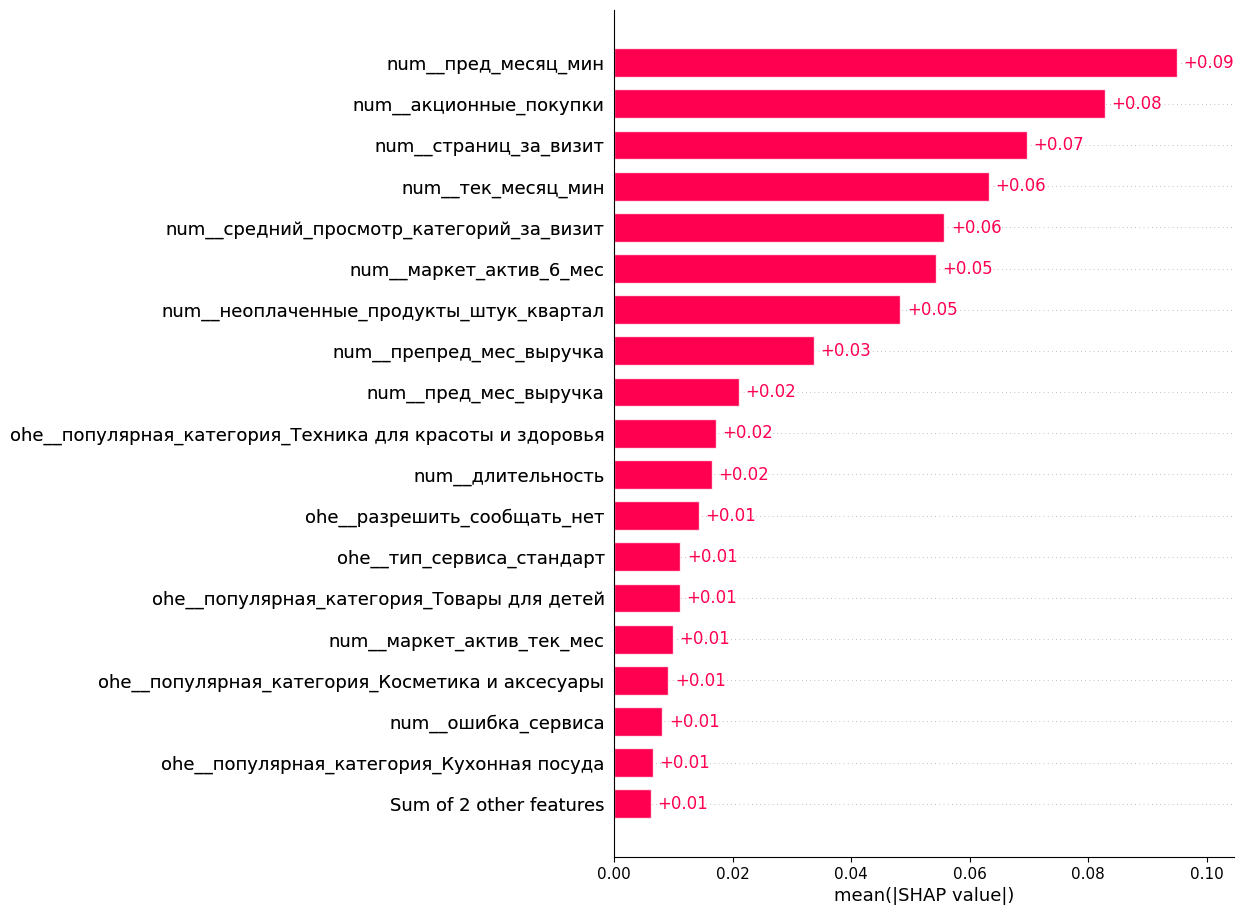

In [235]:
shap.plots.bar(shap_values, max_display=19)

У метода опорных векторов самый большой вес имеет время проведенное на сайте в предыдущем месяце, при этом количество страниц за визит также в троке. 

Вывод: 
- две лучшие модели показали большое влияние на предсказание двух признаков времени проведенного на сайте в предыдущем месяце и количества страниц за визит;
- популярные категории слабо влияют на предсказание модели.


<a id="segmentation"></a>
## Сегментация покупателей

Анализ значимости признаков как для модели логистической регрессии, так и для модели метода опорных векторов показал большое влияние доли акционных покупок на предсказание вероятности снижения активности. Для более детального изучения влияния доли акционных покупок на прибыль исследуем группу клиентов с максимальной долей покупок по акции и высокой вероятностью снижения активности. Работать будем с валидационной выборкой, добавим в таблицу `market_file_finally` вероятность снижения покупательской активности, прибыль от каждого клиента и среднюю выручку по каждому клиенту за последние 3 месяца. 

In [241]:
# подготовим таблицу с данными о прибыльности для объединения с общей таблицей
market = pd.DataFrame(X_test).join(money).reset_index(drop=True)

In [242]:
market.sample(2)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препред_мес_выручка,пред_мес_выручка,тек_мес_выручка,пред_месяц_мин,тек_месяц_мин,прибыль
73,стандарт,да,4.6,4,713,0.24,Мелкая бытовая техника и электроника,4,4,7,12,4986.0,5254.5,5617.2,20,15,4.69
183,стандарт,да,4.1,4,802,0.30,Кухонная посуда,2,3,6,9,4807.0,5417.5,6076.6,16,16,4.89


In [243]:
predict_proba = pd.DataFrame(model.predict_proba(X_test_p)[:, 1])
predict_proba.columns = ['вероятность_сниж_актив']

In [244]:
market['вероятность_сниж_актив'] = predict_proba

In [245]:
market['выручка_средняя'] = (market['препред_мес_выручка'] + market['пред_мес_выручка'] +\
market['тек_мес_выручка'])/3

In [246]:
market.head(3)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препред_мес_выручка,пред_мес_выручка,тек_мес_выручка,пред_месяц_мин,тек_месяц_мин,прибыль,вероятность_сниж_актив,выручка_средняя
0,стандарт,да,5.3,5,433,0.91,Техника для красоты и здоровья,1,1,0,7,5160.0,4712.0,5230.7,15,20,4.47,0.432293,5034.233333
1,премиум,да,4.1,3,813,0.22,Домашний текстиль,3,3,4,5,4889.0,5403.5,5228.0,12,8,3.76,0.679521,5173.500000
2,премиум,да,3.9,5,410,0.20,Косметика и аксесуары,3,1,5,14,5348.0,5052.5,4926.4,17,13,4.34,0.050940,5108.966667


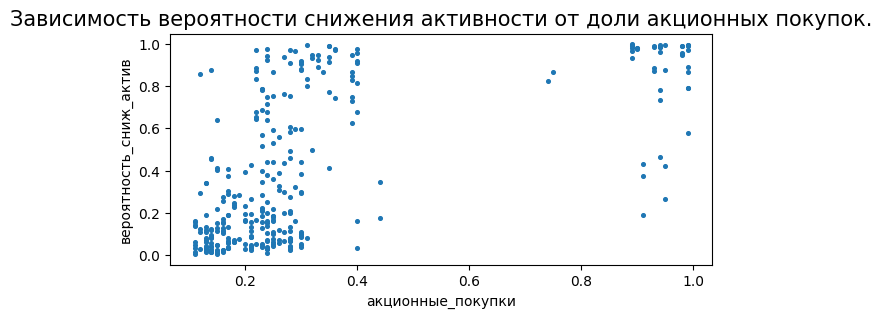

In [247]:
market.plot(kind='scatter', x='акционные_покупки', y='вероятность_сниж_актив', s = 7, figsize=(7, 3))
plt.title('Зависимость вероятности снижения активности от доли акционных покупок.', fontsize=15)
plt.show()

Можно заметить, что начиная с доли акционных покупок в районе 30% вероятность снижения активности в среднем резко возрастает. Найдем такое значение доли акционных покупок, после которого средняя вероятность снижения активности для наблюдений справа от этой границы и слева от границы перестанет расти, либо будет расти очень медленно. 

In [249]:
# Найдем границу
for i in range(10, 60, 5):
    p = i/100
    n_bad = round(market.query('акционные_покупки > @p')['вероятность_сниж_актив'].mean(), 2)
    n_good = round(market.query('акционные_покупки < @p')['вероятность_сниж_актив'].mean(), 2)
    print(n_bad, n_good, p)

0.39 nan 0.1
0.45 0.14 0.15
0.51 0.14 0.2
0.61 0.22 0.25
0.81 0.24 0.3
0.81 0.28 0.35
0.82 0.31 0.4
0.85 0.32 0.45
0.85 0.32 0.5
0.85 0.32 0.55


Выделим сегмент покупателей с долей акционных покупок выше 45%, модель в среднем прогназирует для таких наблюдений  что с вероятностью 0.87 активность будет снижаться. Но также можно заметить, что начиная с 30% акционных покупок средняя вероятность снижения активности уже довольно велика, 0.83. Чтобы наша выборка была больше и информативнее, выберем за границу значение 0.3. Что касается вероятности снижение активности, граничное значение примем за 0.6. 
Клиентами с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности будем называть клиентов чья доля покупок по акции превышает 0.3 и вероятность снижение активности превышает 0.6. Выделим данный сегмент из датафрейма и изучим его.

In [251]:
# выделяем сегмент
market_res = market.query('(акционные_покупки > 0.3) and (вероятность_сниж_актив > 0.6)')

Начнем исследование нашего сегмента с тех признаков, которые сильнее всего влияли на предсказание модели. На первом месте стояло количество минут проведенных на сайте в предыдущем месяце.

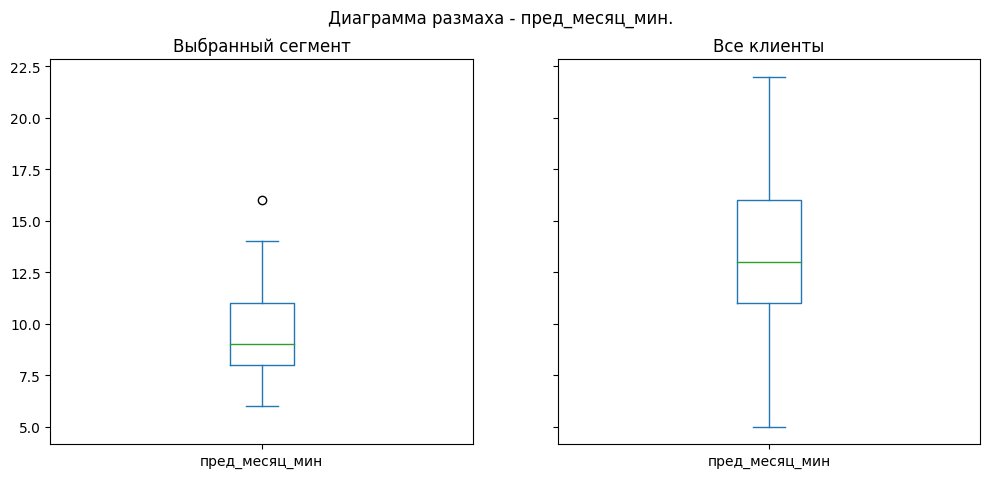

In [253]:
# Построим гистограмму для нашего сегмента и для всех наблюдений
def graf_6(col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    market_res[col].plot(kind='box', ax=axes[0])
    axes[0].set_title('Выбранный сегмент')
    market[col].plot(kind='box', ax=axes[1])
    axes[1].set_title('Все клиенты')

    plt.suptitle(f'Диаграмма размаха - {col}.')
    plt.show()
    
graf_6('пред_месяц_мин')

Скорее всего покупатели выбранного нами сегмента более нацеленно приходят на сайт, так как для них важна скидка на товар, ориентируясь на ее наличие или отсутсвие, такие клиенты быстрее принимают решение. Дествительно медианное значение в сегменте меньше чем во всей выборке, но стоит проверить влияет ли время проведенное на сайте на выручку и прибыль, которую приносят клиенты из нашего сегмента. И может быть это просто нормальное время для такого типа клиентов, сравним время по месяцам и посмотрим на выручку.

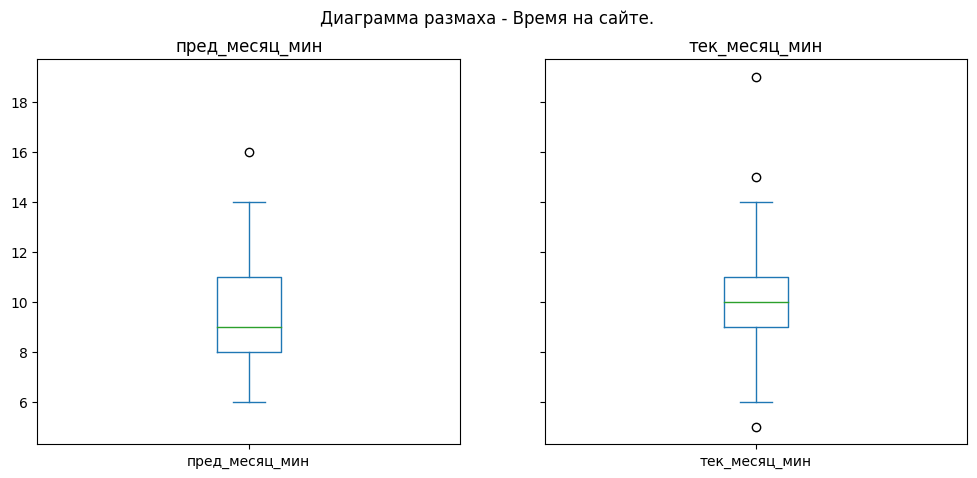

In [255]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

market_res['пред_месяц_мин'].plot(kind='box', ax=axes[0])
axes[0].set_title('пред_месяц_мин')
market_res['тек_месяц_мин'].plot(kind='box', ax=axes[1])
axes[1].set_title('тек_месяц_мин')

plt.suptitle(f'Диаграмма размаха - Время на сайте.')
plt.show()

Время стало только больше.

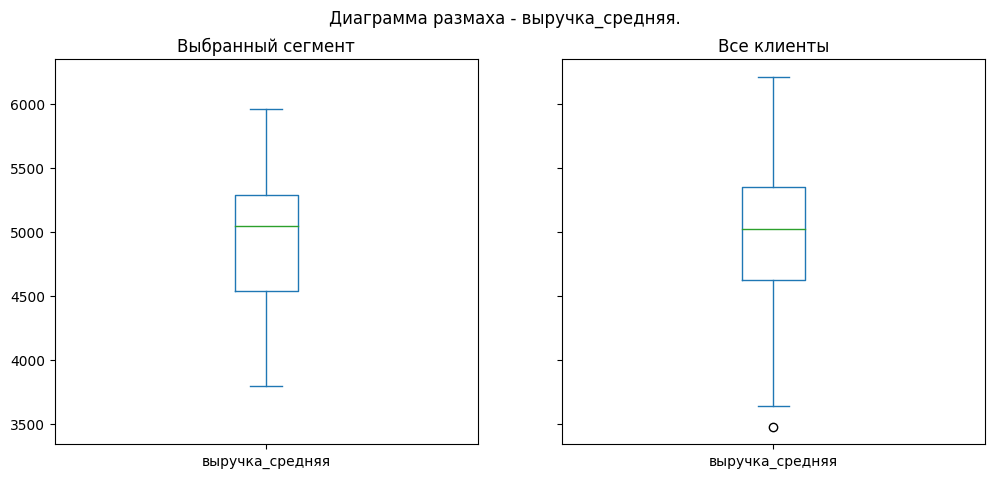

In [257]:
graf_6('выручка_средняя')

Как мы видим, скорость принятия решения никак не влияет на среднюю выручку. А что насчет количества страниц за визит, этот признак также имел большой вес при предсказании снижения активности.

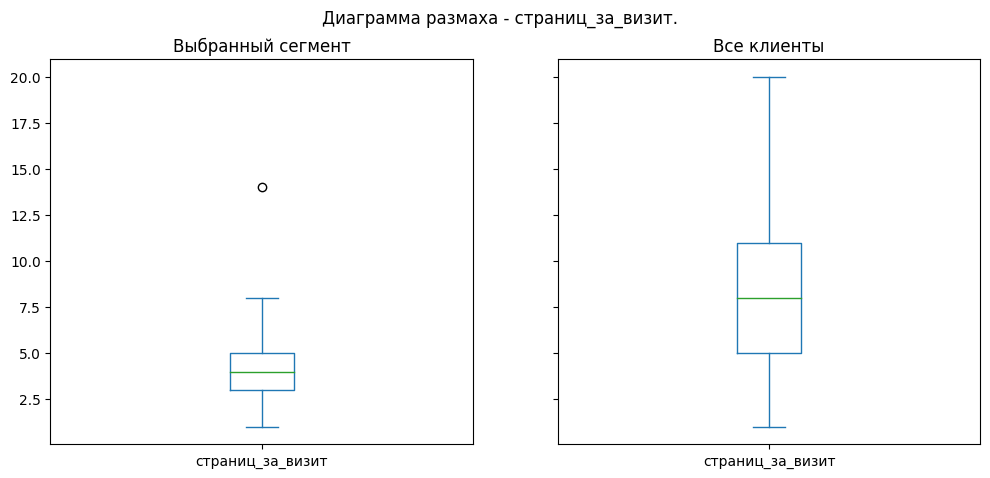

In [259]:
graf_6('страниц_за_визит')


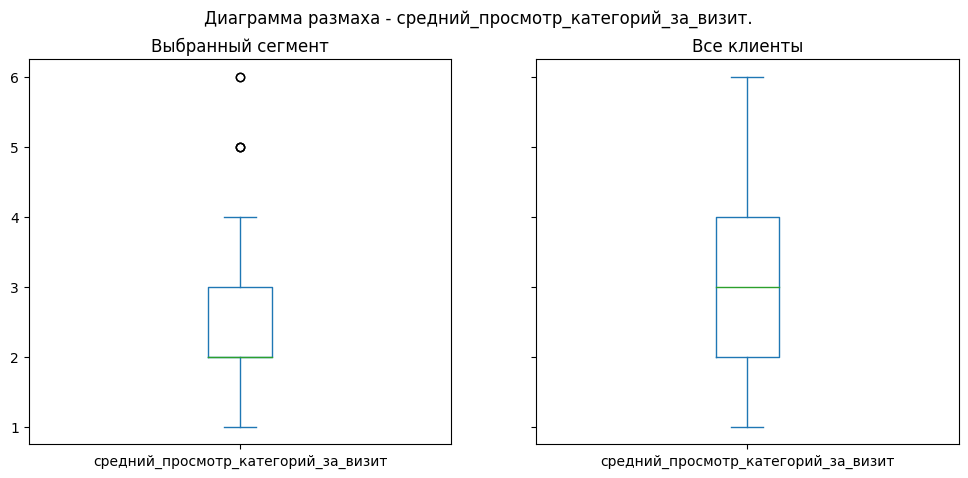

In [260]:
graf_6('средний_просмотр_категорий_за_визит')

Действительно клиенты нашего сегмента посещают почти в два раза меньше страниц за визит и просматривают меньше категорий, но причина может быть такая же, как и в случае со временем, они просто знают что хотят, и ждут своих акций. Может быть от таких клиентов совсем маленькая прибыль, стоит проверить!

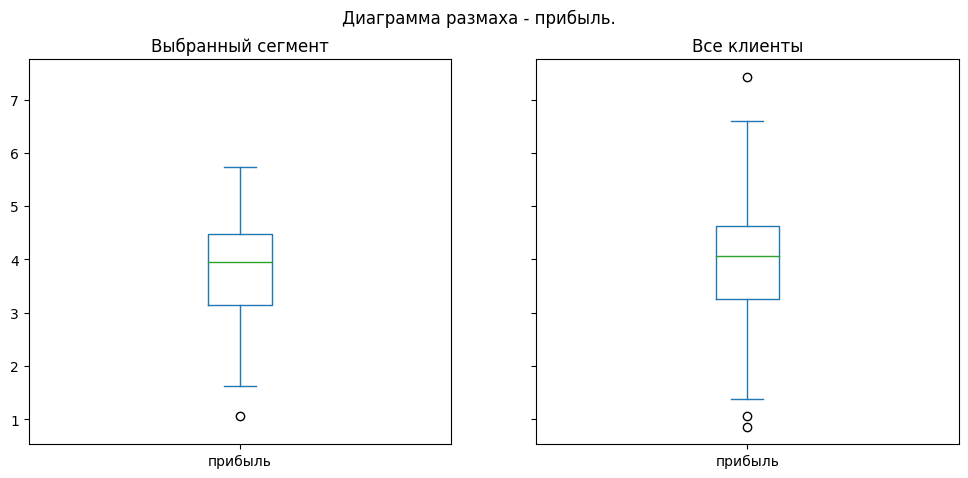

In [262]:
graf_6('прибыль')

Нельзя сказать, что нам невыгодно работать с покупателями выбранного нами сегмента. А что насчет разнообразия товара, который покупают клиенты нашей группы? 

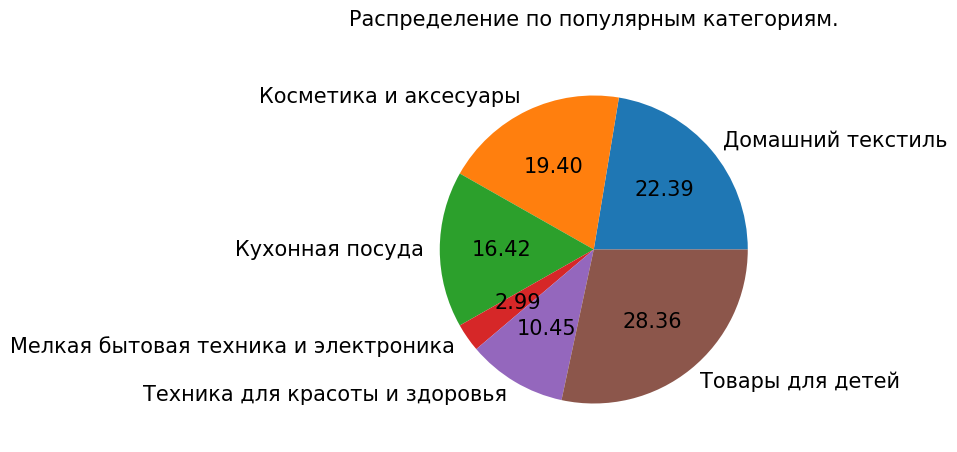

In [264]:
market_res.groupby(by='популярная_категория')['популярная_категория'].count().plot(
   kind='pie', subplots=True,  autopct="%.2f",fontsize=15, figsize=(15, 5)
)
plt.ylabel('')
plt.title('Распределение по популярным категориям.'+'\n', fontsize=15)
plt.show()

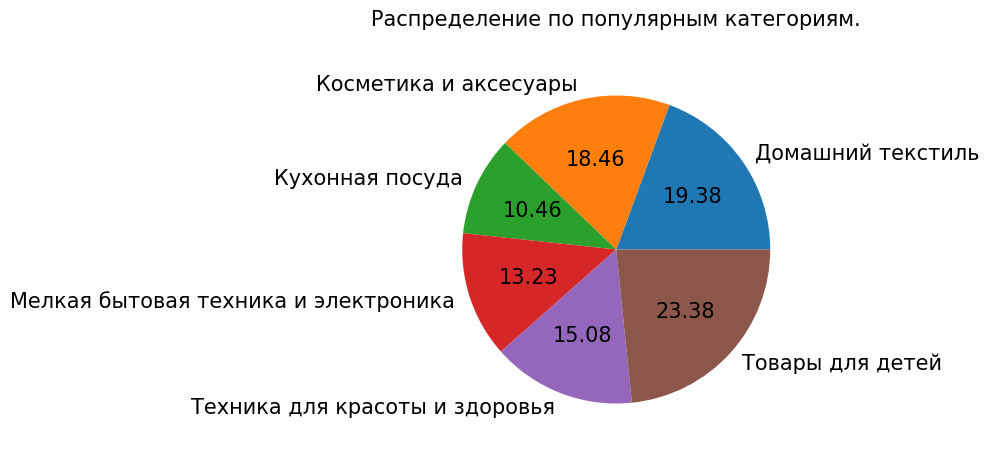

In [265]:
market.groupby(by='популярная_категория')['популярная_категория'].count().plot(
   kind='pie', subplots=True,  autopct="%.2f",fontsize=15, figsize=(15, 5)
)
plt.ylabel('')
plt.title('Распределение по популярным категориям.'+'\n', fontsize=15)
plt.show()

Мы видим, что категория `мелкая бытовая техника и электроника` проседает у нашего сегмента. Интересно, влияет ли тип категории на прибыль? Может быть `мелкая бытовая техника и электроника` очень прибыльная для нас категория, и стоит проработать рекомендации, чтобы клиенты выбранного сегмента чаще покупали товары данной категории? Проверим!

In [267]:
market.groupby(by='популярная_категория')['прибыль'].mean().sort_values(ascending=False)

популярная_категория
Кухонная посуда                         4.101176
Домашний текстиль                       4.048095
Косметика и аксесуары                   3.989333
Товары для детей                        3.956711
Мелкая бытовая техника и электроника    3.896047
Техника для красоты и здоровья          3.746122
Name: прибыль, dtype: float64

Похоже, что нет! Но все же мы видим точку роста, всего у 4.35% покупателей выбранной нами группы  популярная категория `мелкая бытовая техника и электроника`. И наконец посмотрим, как много в нашей группе неоплаченных товаров в среднем за квартал.

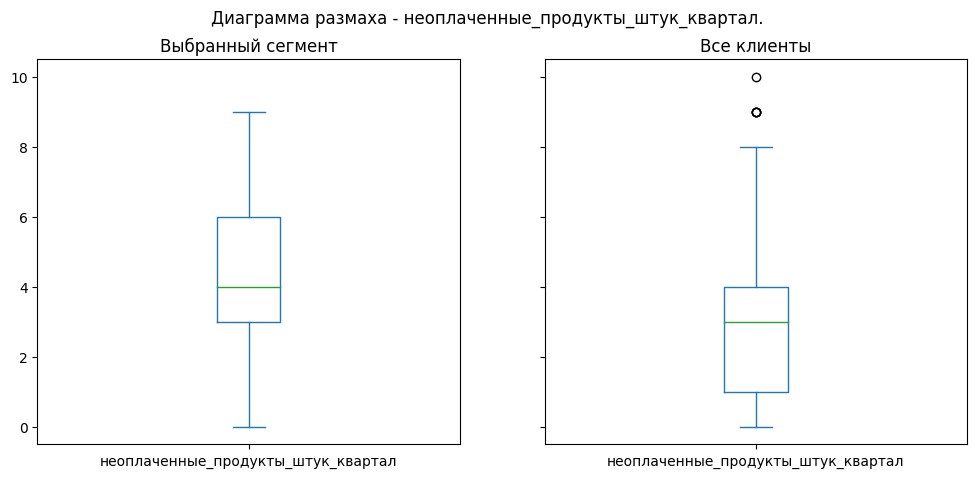

In [269]:
graf_6('неоплаченные_продукты_штук_квартал')

Ожидаемо больше! Клиент мог добавить товар по скидке и не успеть его купить, или наоборот добавить товар в корзину и ждать скидку.

Вывод.
Клиентам выбранного нами сегмента часто присваивается высокая вероятность снижения активности, но при этом скорее всего это не совсем верная оценка. Похоже, небольшое время проводимое на сайте, малое количество просматриваемых категорий и страниц за визит, большое количество неоплаченных товаров склоняет модель присвоить класс 1. Но это просто модель поведения клиентов нашего сегмента. Они приносят прибыль сопостовимую с остальными клиентами, выручка также не проседает. Наш анализ показал, что клиенты нашей группы покупают мало товаров категории `мелкая бытовая техника и электроника`, можно рассмотреть возможность проведении различных акций в данной категории с целью привлечения новых клиентов.

<a id="the_general_conclusion"></a>
##  Общий вывод.

Перед нами стояла задача построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца. При этом было необходимо включить в исследование дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца. Используя данные модели и данные о прибыльности клиентов, было необходимо выделить сегменты покупателей и разработать для них персонализированные предложения. 

Данные для работы находилсь в нескольких таблицах: 
- таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
- таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом;
- таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода;
- таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

На этапе предобработки данных:
- необнаруженно явных дубликатов;
- в таблице market_file исправлена ошибка в столбце тип_сервиса;
- в таблице market_time исправлена ошибка в столбце период.

При поиске лучшей модели нами были проделаны следующие шаги:
- используя ColumnTransformer были закодированны категориальные признаки, для количественных признаков мы использовали масштабирование признаков;
- обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подобрали гиперпараметр; 
- выбрали метрику roc-auc для оценки качества модели;
- метод опорных векторов дал лучшие показатели метрики.

Для исследования была выбрана группа клиентов с максимальной долей покупок по акции (более 0.3) и высокой вероятностью снижения покупательской активности(0.83). Нам удалось сопоставить прибыль от данной группы и прибыль от всех клиентов, диаграммы показали, что разница не существенная. Также можно сделать вывод, что характер поведения клиентов данного сегмента, отличается от общей массы клиентов, что может приводить к неверным предсказаниям класса для данных клиентов.